In [17]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../..')  # Add root directory to path to find src

In [18]:
from scripts.EDA_src.constructs import identify_column_types, create_construct_groups, create_aggregate_features, analyze_construct
from scripts.EDA_src.univariate import univariate_numeric, univariate_categorical, univariate_binary
from scripts.EDA_src.bivariate import bivariate_numeric_numeric, bivariate_categorical_numeric, bivariate_categorical_categorical
from scripts.EDA_src.platform_analysis import analyze_purchase_behavior, analyze_platform_usage, correlation_analysis, multivariate_analysis
from scripts.EDA_src.multivariate import pca_analysis, cluster_analysis

### **Load Data**

In [19]:
def load_data(file_path):
    """
    Load the dataset from a file path
    """
    df = pd.read_csv(file_path)
    print(f"Data loaded with {df.shape[0]} rows and {df.shape[1]} columns")
    return df

# Load data
df = load_data('../../data/cleaned/cleaned_survey_data.csv')

Data loaded with 825 rows and 133 columns


In [20]:
focus_columns=[
    'opi_satisfaction', 
    'opi_behavior_change', 
    'opi_purchased?', 
    'peou_navigation_1', 
    'pu_product_1'
]

### **Identify column types and create construct groups**

In [21]:
col_types = identify_column_types(df)
constructs = create_construct_groups(df)

### **Basic dataset exploration**

In [22]:
print(f"Dataset shape: {df.shape}")
print(f"\nMissing values summary:")
missing = df.isna().sum()
print(missing[missing > 0])

Dataset shape: (825, 133)

Missing values summary:
Series([], dtype: int64)


The dataset contains 825 survey respondents with 135 variables, providing a comprehensive view of factors potentially affecting online purchase intention. Importantly, there are no missing values in the dataset, which ensures high data quality and eliminates the need for imputation techniques. This complete dataset allows for reliable analysis of relationships between user characteristics and their online purchasing behavior.

### **Analyze by constructs**

Analyzing PEOU construct with 10 variables

Summary Statistics:
                     count      mean       std  min  25%  50%  75%  max  \
peou_navigation_1    825.0  3.528485  0.851598  1.0  3.0  3.0  4.0  5.0   
peou_navigation_2    825.0  3.429091  0.786801  1.0  3.0  3.0  4.0  5.0   
peou_learning_1      825.0  3.446061  0.818365  1.0  3.0  3.0  4.0  5.0   
peou_learning_2      825.0  3.440000  0.814969  1.0  3.0  3.0  4.0  5.0   
peou_instructions_1  825.0  3.275152  0.690206  1.0  3.0  3.0  4.0  5.0   
peou_instructions_2  825.0  3.374545  0.744939  1.0  3.0  3.0  4.0  5.0   
peou_response_1      825.0  3.215758  0.781767  1.0  3.0  3.0  4.0  5.0   
peou_response_2      825.0  2.898182  0.711766  1.0  3.0  3.0  3.0  5.0   
peou_error_1         825.0  3.026667  0.787812  1.0  3.0  3.0  3.0  5.0   
peou_error_2         825.0  2.953939  0.823096  1.0  2.0  3.0  3.0  5.0   

                     missing  missing_pct  
peou_navigation_1          0          0.0  
peou_navigation_2     

<Figure size 1500x800 with 0 Axes>

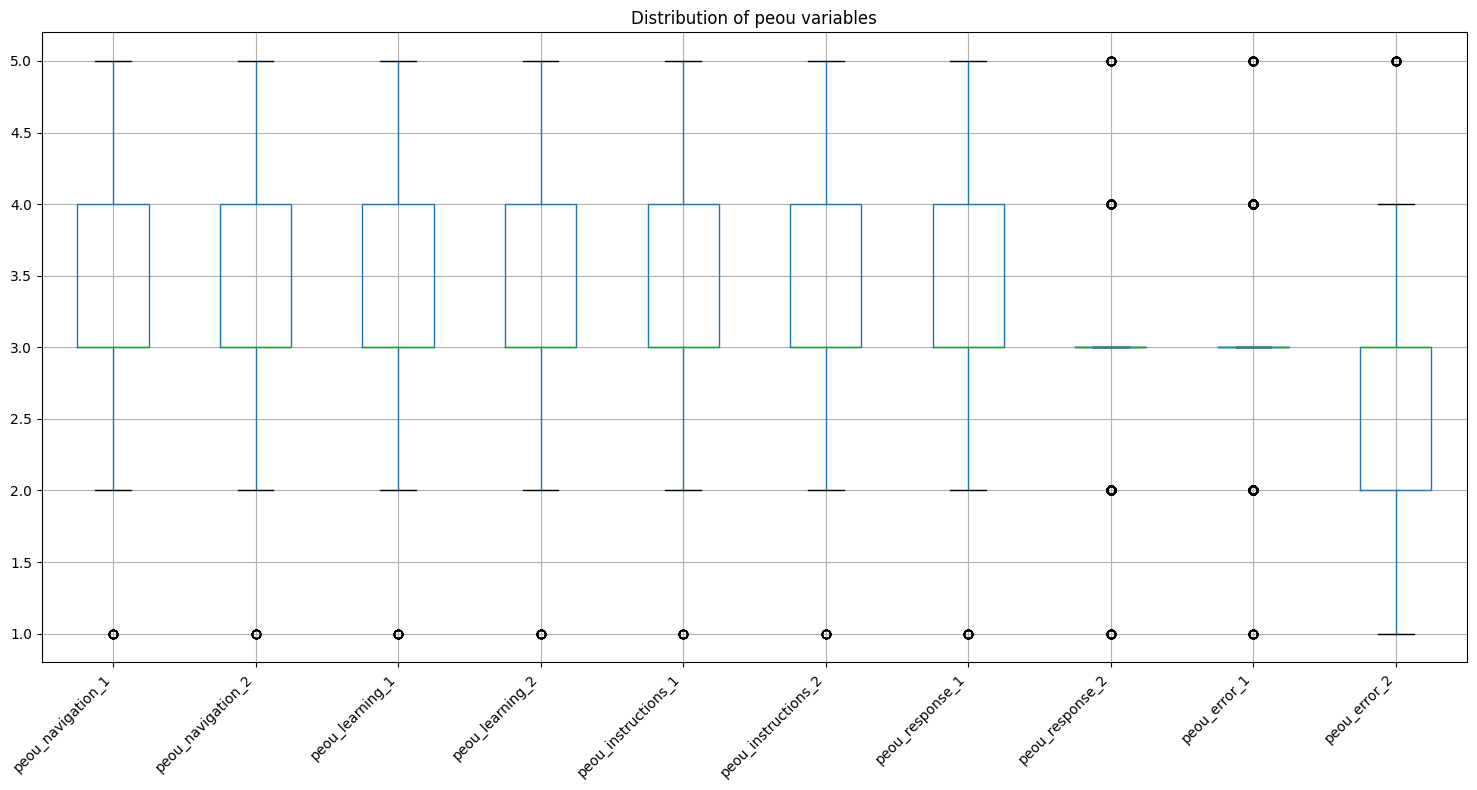

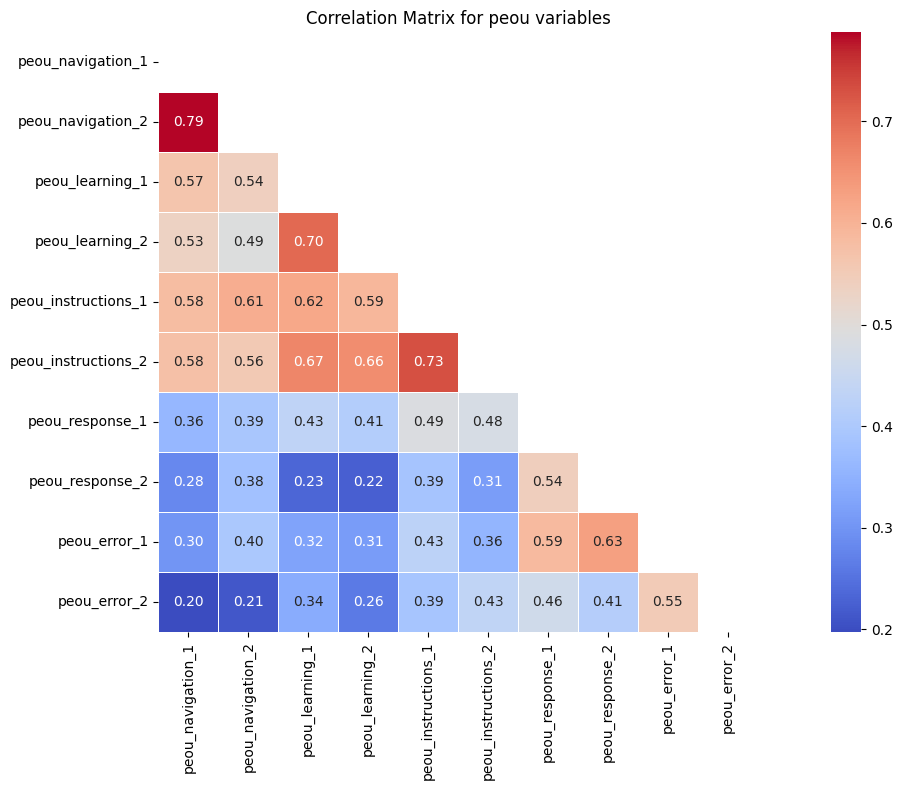

Analyzing PU construct with 10 variables

Summary Statistics:
                      count      mean       std  min  25%  50%  75%  max  \
pu_product_1          825.0  3.356364  0.811947  1.0  3.0  3.0  4.0  5.0   
pu_product_2          825.0  3.313939  0.748534  1.0  3.0  3.0  4.0  5.0   
pu_convenience_1      825.0  3.665455  0.918833  1.0  3.0  4.0  4.0  5.0   
pu_convenience_2      825.0  3.607273  0.885945  1.0  3.0  3.0  4.0  5.0   
pu_cost_1             825.0  3.115152  0.774331  1.0  3.0  3.0  3.0  5.0   
pu_cost_2             825.0  3.161212  0.818149  1.0  3.0  3.0  4.0  5.0   
pu_info_1             825.0  3.126061  0.683447  1.0  3.0  3.0  3.0  5.0   
pu_info_2             825.0  3.166061  0.814202  1.0  3.0  3.0  4.0  5.0   
pu_personalization_1  825.0  3.219394  0.701325  1.0  3.0  3.0  4.0  5.0   
pu_personalization_2  825.0  3.186667  0.709893  1.0  3.0  3.0  4.0  5.0   

                      missing  missing_pct  
pu_product_1                0          0.0  
pu_product_

<Figure size 1500x800 with 0 Axes>

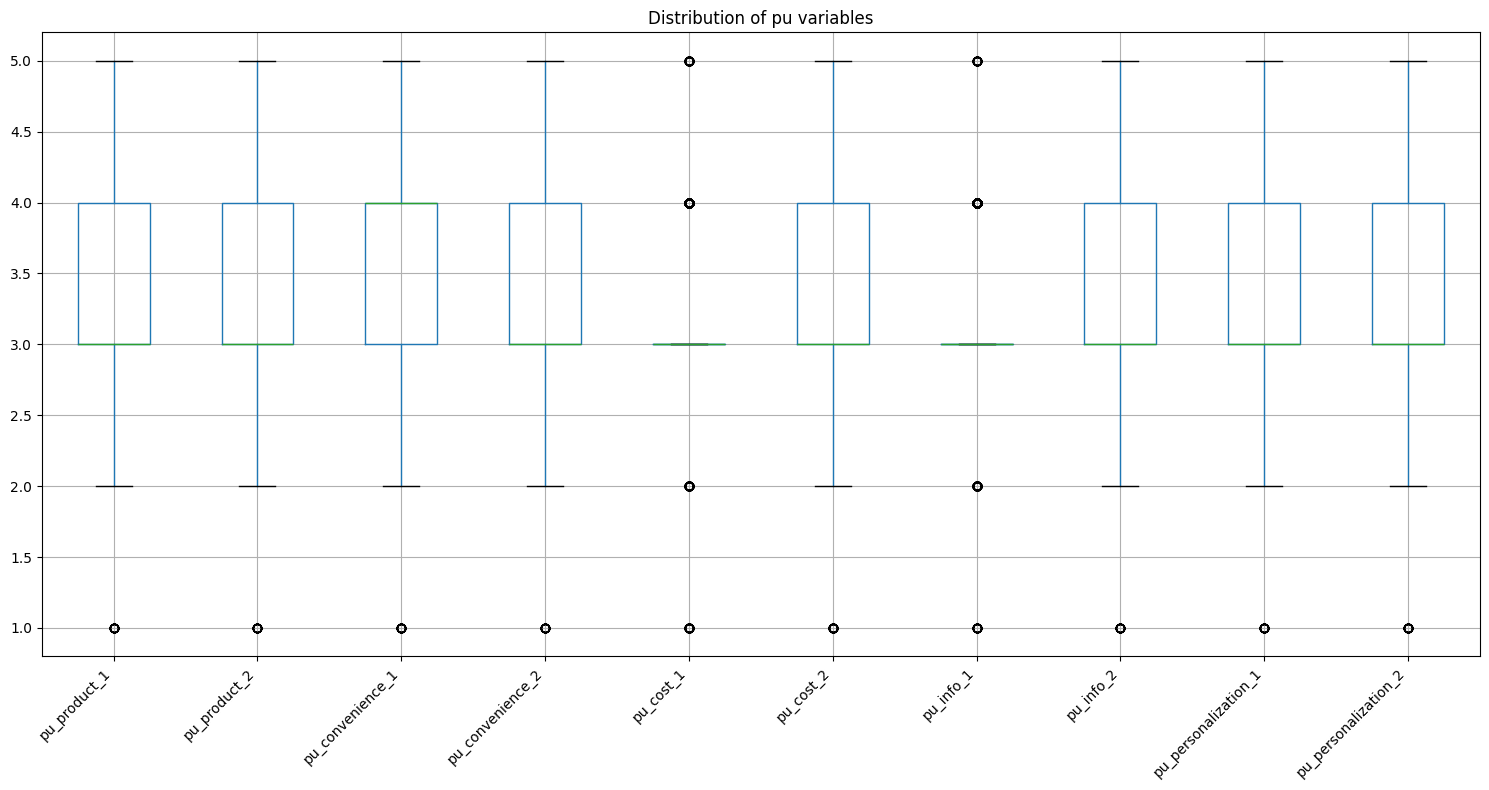

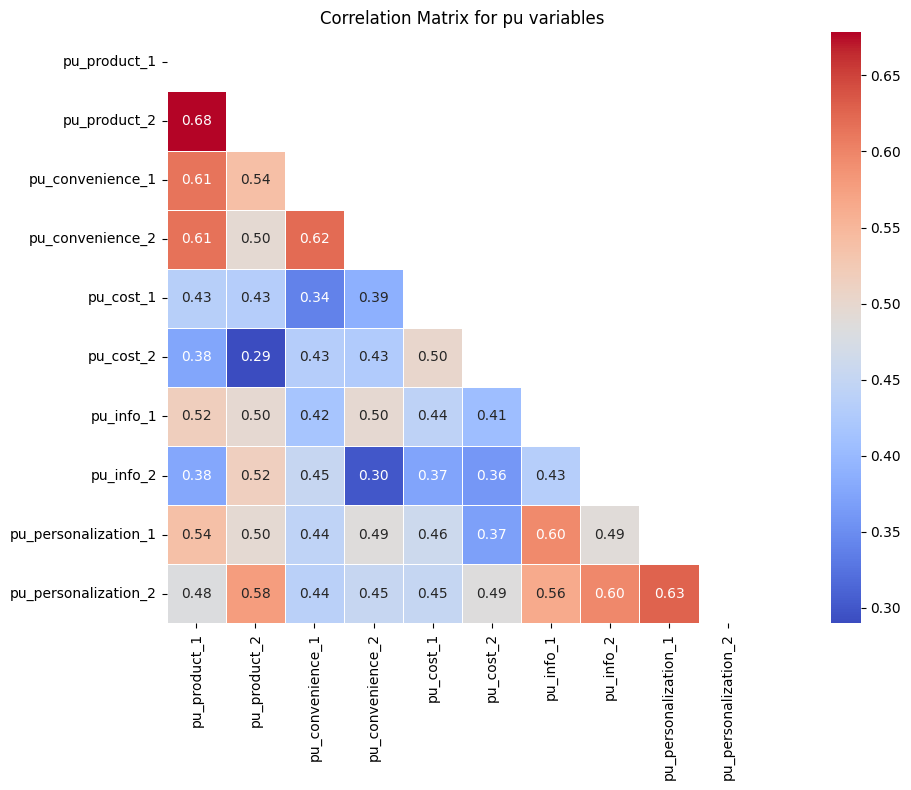

Analyzing SA construct with 6 variables

Summary Statistics:
              count      mean       std  min  25%  50%  75%  max  missing  \
sa_privacy_1  825.0  3.174545  0.674488  1.0  3.0  3.0  3.0  5.0        0   
sa_privacy_2  825.0  3.115152  0.684485  1.0  3.0  3.0  3.0  5.0        0   
sa_payment_1  825.0  3.309091  0.662979  1.0  3.0  3.0  4.0  5.0        0   
sa_payment_2  825.0  3.311515  0.724854  1.0  3.0  3.0  4.0  5.0        0   
sa_policy_1   825.0  3.152727  0.690396  1.0  3.0  3.0  3.0  5.0        0   
sa_policy_2   825.0  3.088485  0.659638  1.0  3.0  3.0  3.0  5.0        0   

              missing_pct  
sa_privacy_1          0.0  
sa_privacy_2          0.0  
sa_payment_1          0.0  
sa_payment_2          0.0  
sa_policy_1           0.0  
sa_policy_2           0.0  


<Figure size 1500x800 with 0 Axes>

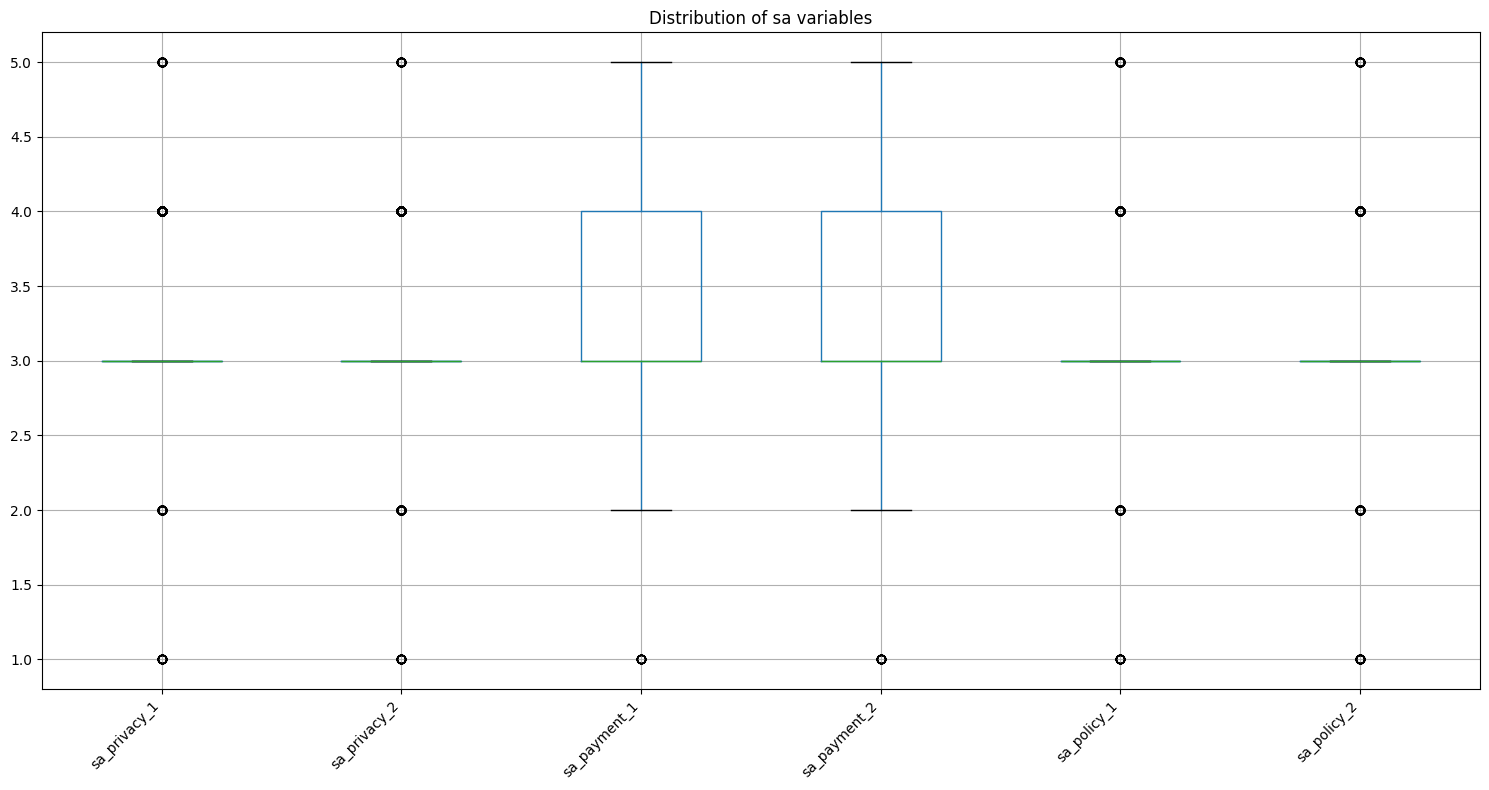

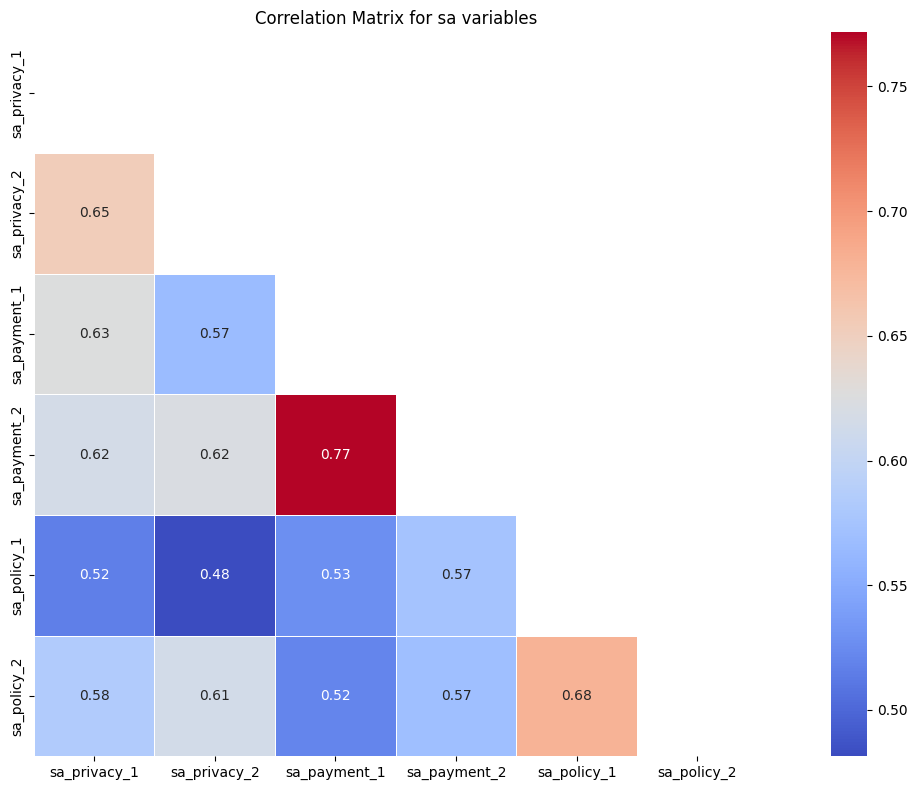

Analyzing SI construct with 12 variables

Summary Statistics:
                   count      mean       std  min  25%  50%  75%  max  \
si_wom_1           825.0  3.506667  0.895114  1.0  3.0  3.0  4.0  5.0   
si_wom_2           825.0  3.524848  0.786522  1.0  3.0  3.0  4.0  5.0   
si_social_media_1  825.0  3.486061  0.940002  1.0  3.0  3.0  4.0  5.0   
si_social_media_2  825.0  3.421818  0.842735  1.0  3.0  3.0  4.0  5.0   
si_reviews_1       825.0  3.584242  0.855022  1.0  3.0  3.0  4.0  5.0   
si_reviews_2       825.0  3.757576  0.917412  1.0  3.0  4.0  5.0  5.0   
si_social_proof_1  825.0  3.343030  0.761579  1.0  3.0  3.0  4.0  5.0   
si_social_proof_2  825.0  3.249697  0.805444  1.0  3.0  3.0  4.0  5.0   
si_normative_1     825.0  3.157576  0.685774  1.0  3.0  3.0  4.0  5.0   
si_normative_2     825.0  2.842424  0.835728  1.0  2.0  3.0  3.0  5.0   
si_sharing_1       825.0  3.293333  0.747985  1.0  3.0  3.0  4.0  5.0   
si_sharing_2       825.0  3.341818  0.725412  1.0  3.0  3.0  4

<Figure size 1500x800 with 0 Axes>

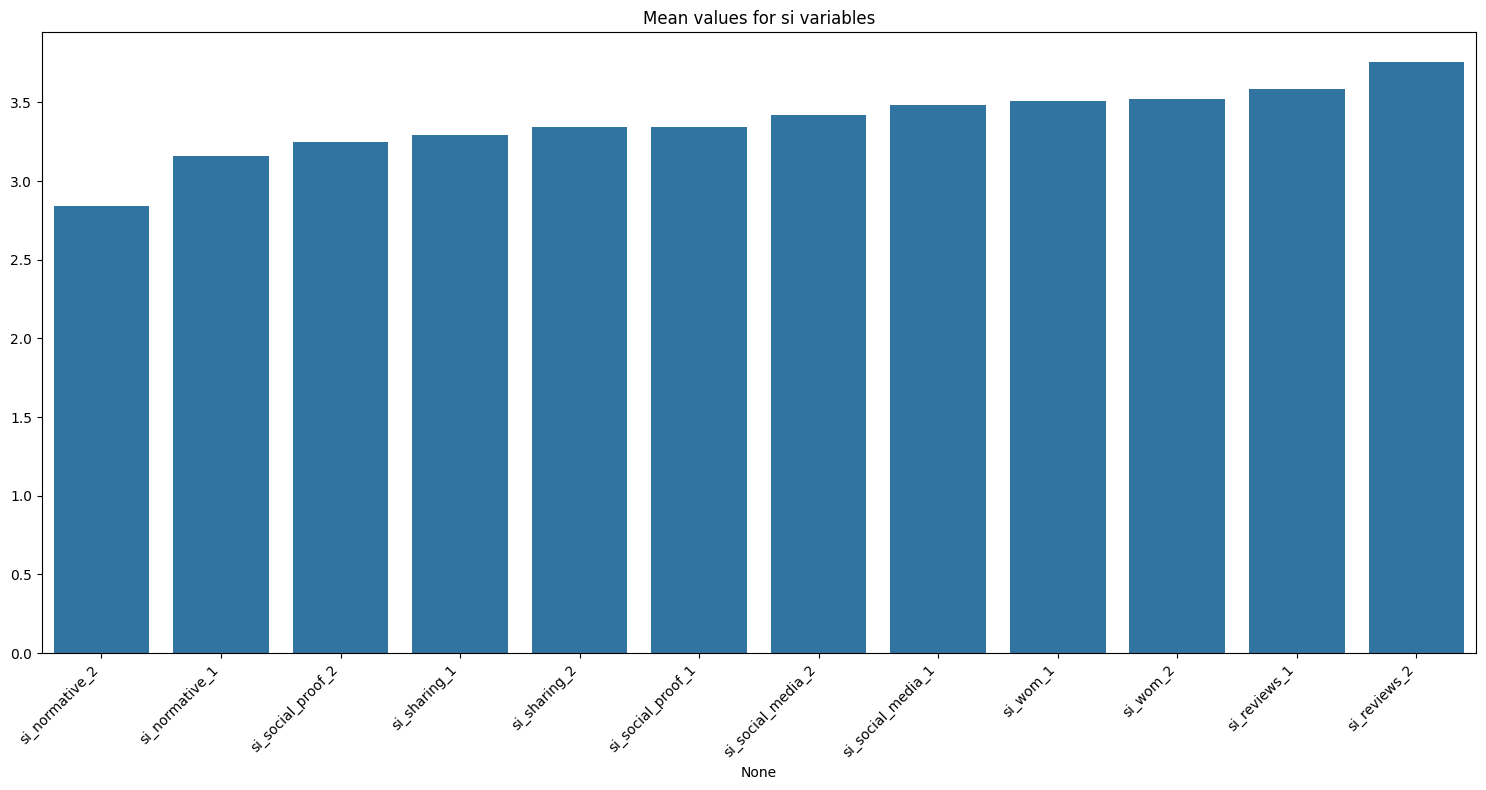

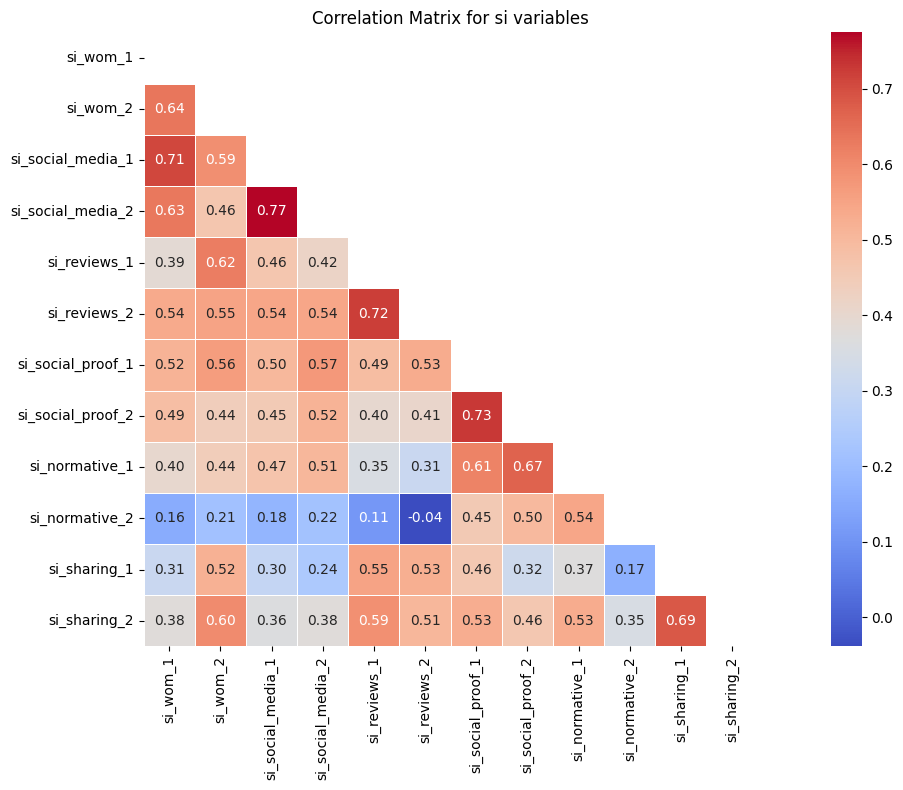

Analyzing ATT construct with 2 variables

Summary Statistics:
                count      mean       std  min  25%  50%  75%  max  missing  \
att_positive_1  825.0  3.829091  0.826519  1.0  3.0  4.0  4.0  5.0        0   
att_positive_2  825.0  3.877576  0.726271  1.0  4.0  4.0  4.0  5.0        0   

                missing_pct  
att_positive_1          0.0  
att_positive_2          0.0  


<Figure size 1500x800 with 0 Axes>

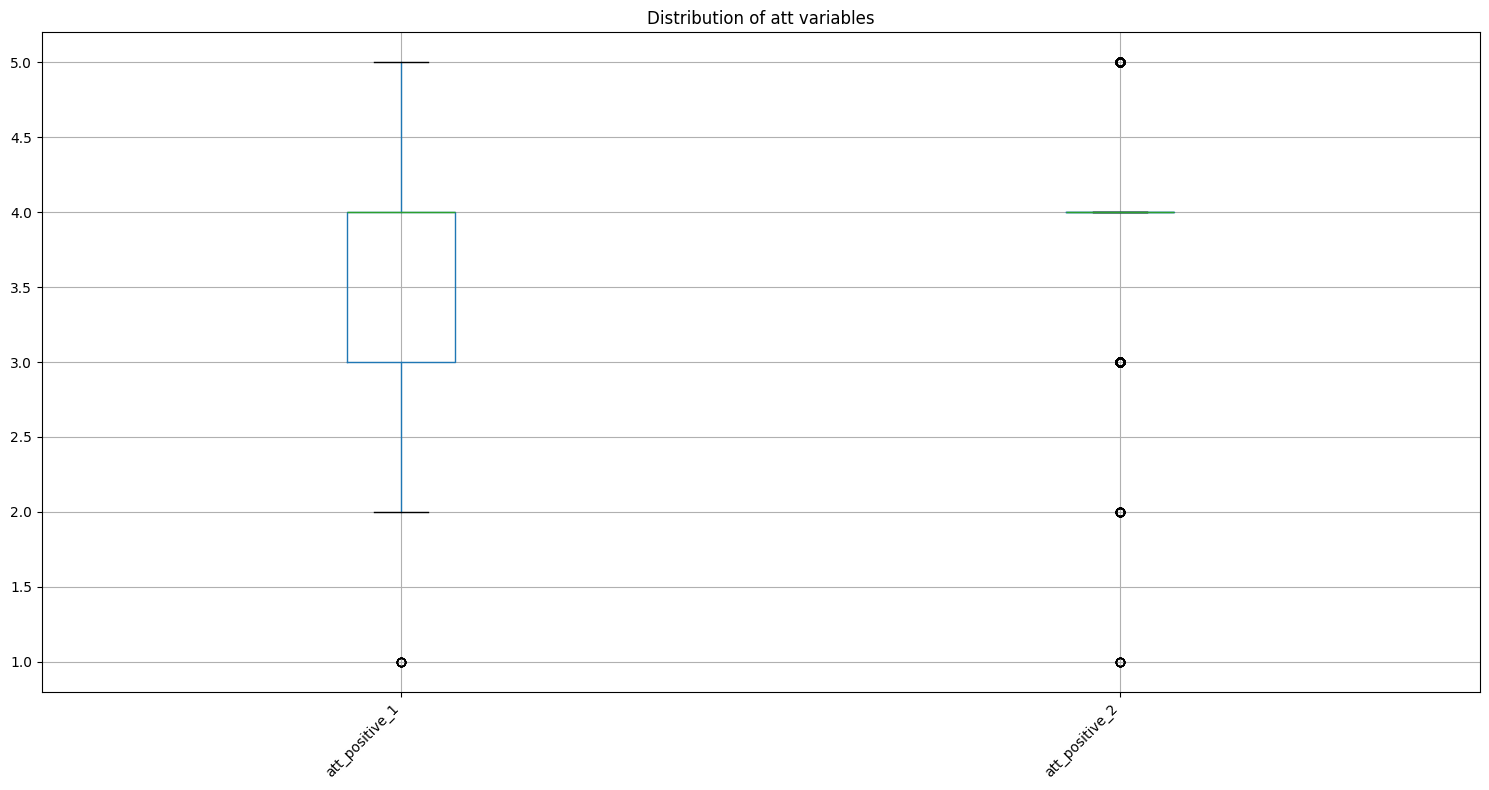

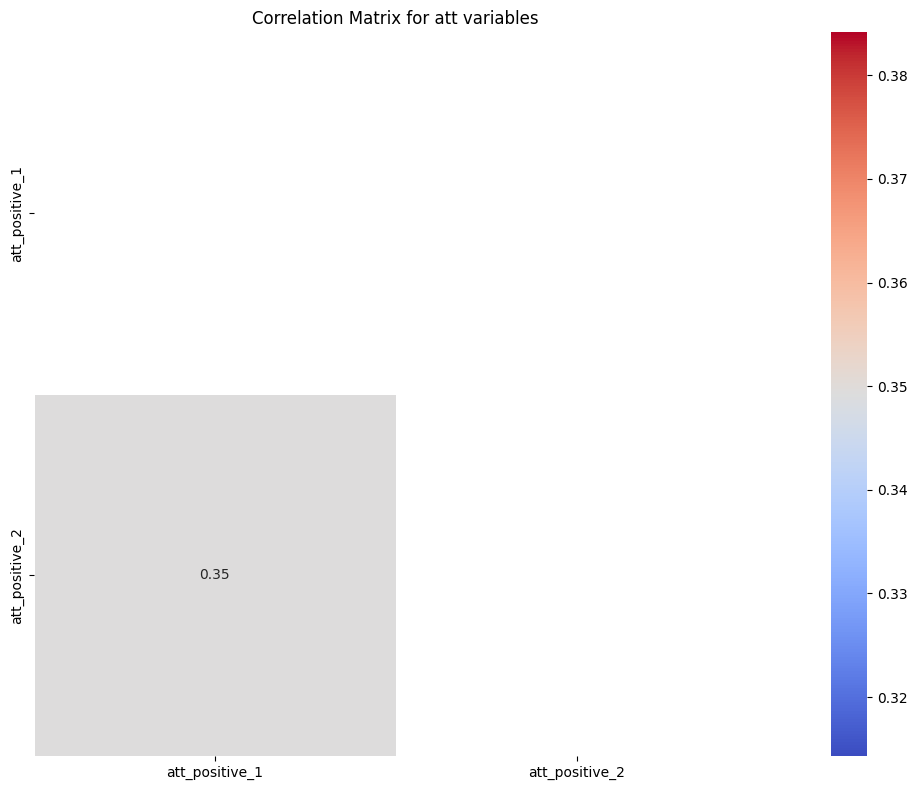

Analyzing RISK construct with 2 variables

Summary Statistics:
                     count      mean       std  min  25%  50%  75%  max  \
risk_security_1      825.0  3.967273  0.854824  1.0  4.0  4.0  5.0  5.0   
risk_authenticity_1  825.0  3.783030  0.811150  1.0  3.0  4.0  4.0  5.0   

                     missing  missing_pct  
risk_security_1            0          0.0  
risk_authenticity_1        0          0.0  


<Figure size 1500x800 with 0 Axes>

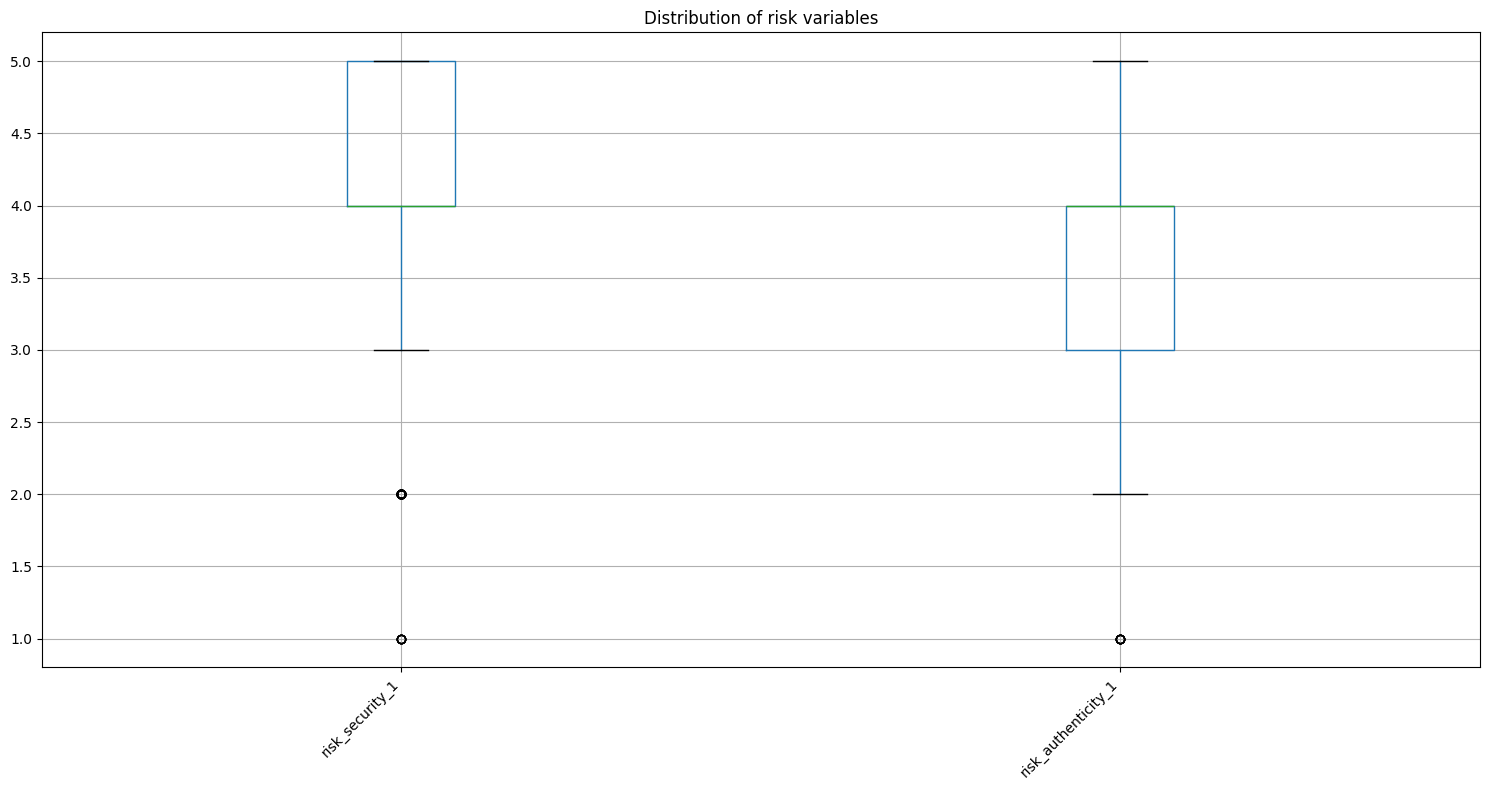

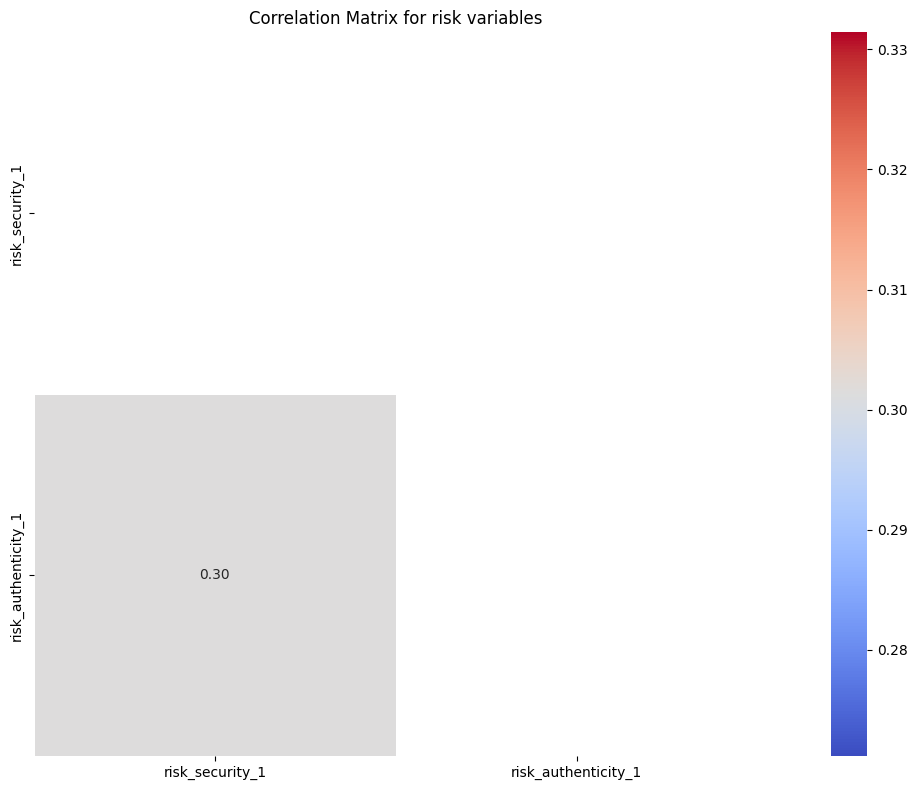

Analyzing OPI construct with 5 variables

Summary Statistics:
                     count      mean       std  min  25%  50%  75%  max  \
opi_satisfaction     825.0  3.743030  0.818122  1.0  3.0  4.0  4.0  5.0   
opi_behavior_change  825.0  3.904242  0.713459  1.0  4.0  4.0  4.0  5.0   
opi_convenience      825.0  3.840000  0.731470  1.0  3.0  4.0  4.0  5.0   
opi_value            825.0  3.780606  0.759479  1.0  3.0  4.0  4.0  5.0   
opi_purchased?       825.0  0.967273  0.178030  0.0  1.0  1.0  1.0  1.0   

                     missing  missing_pct  
opi_satisfaction           0          0.0  
opi_behavior_change        0          0.0  
opi_convenience            0          0.0  
opi_value                  0          0.0  
opi_purchased?             0          0.0  


<Figure size 1500x800 with 0 Axes>

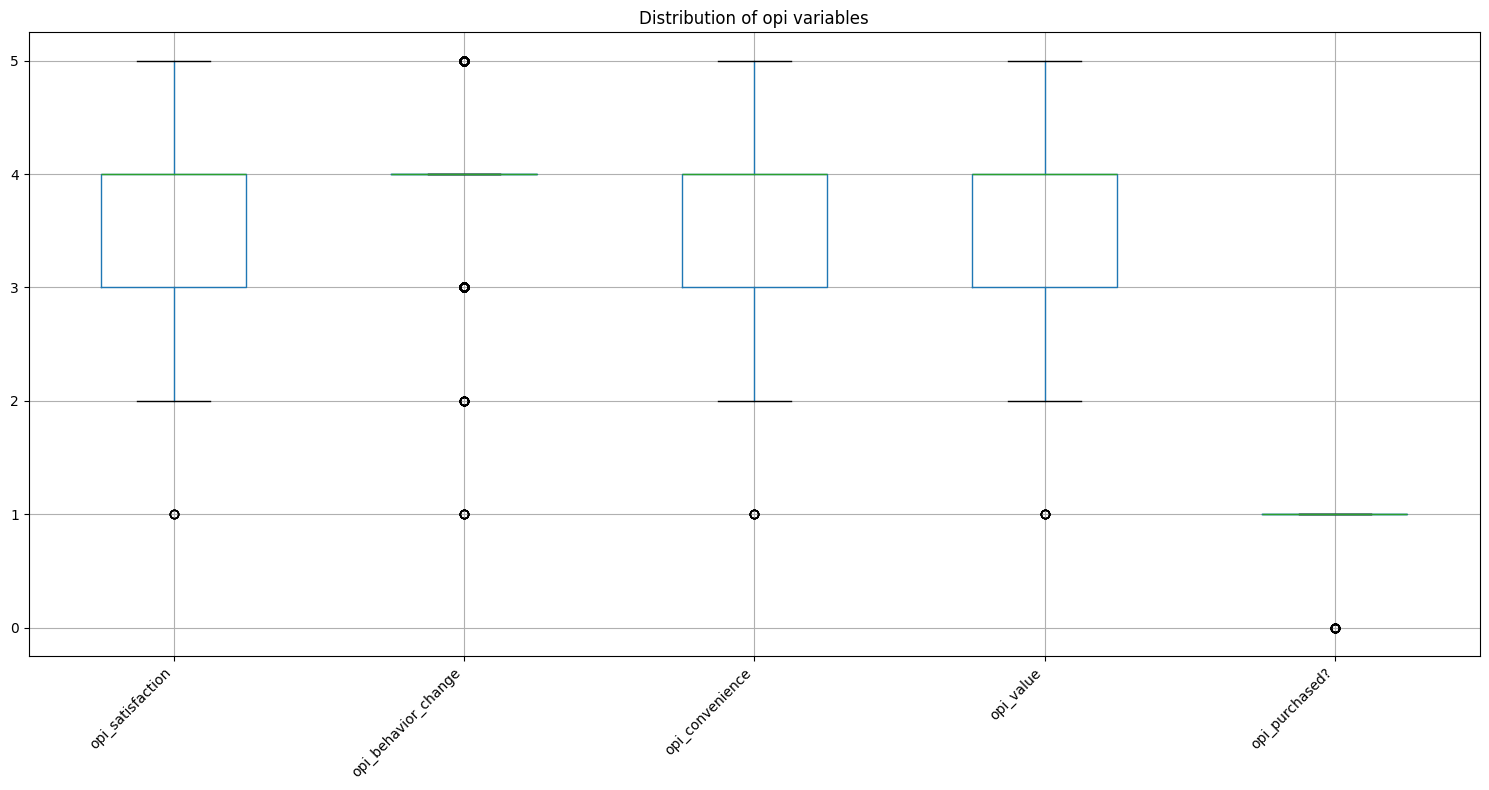

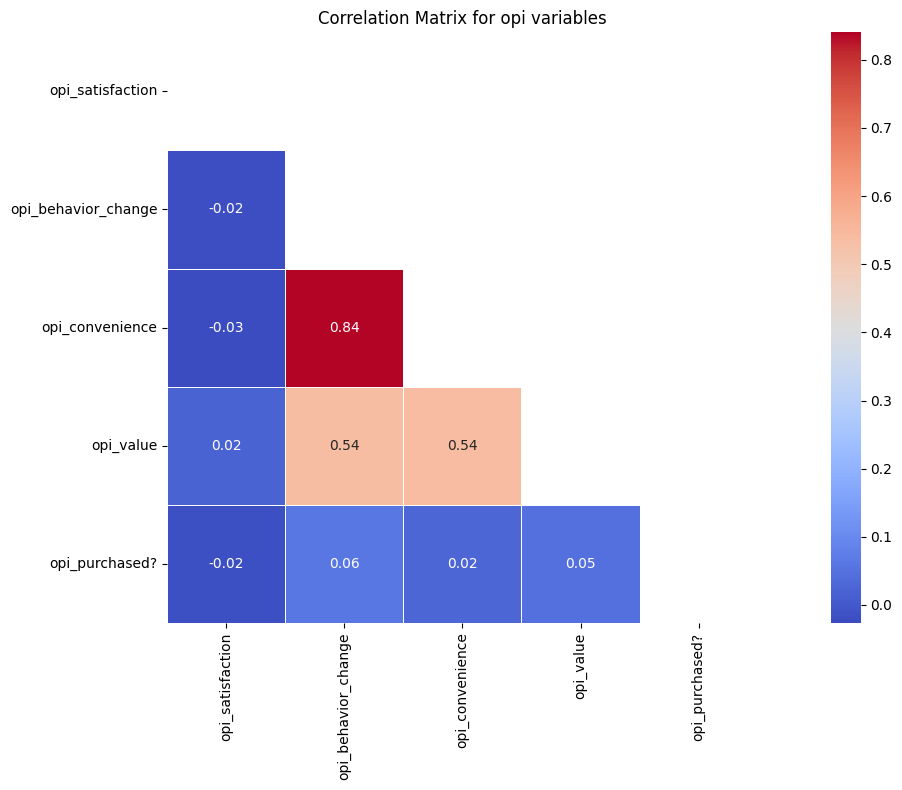

Analyzing PLATFORMS construct with 20 variables

Summary Statistics:
                             count      mean       std  min  25%  50%  75%  \
gecp_None                    825.0  0.031515  0.174811  0.0  0.0  0.0  0.0   
gecp_ali_express             825.0  0.012121  0.109493  0.0  0.0  0.0  0.0   
gecp_amazon                  825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_ebay                    825.0  0.008485  0.091777  0.0  0.0  0.0  0.0   
gecp_instagram_stores        825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_keels                   825.0  0.004848  0.069504  0.0  0.0  0.0  0.0   
gecp_lassanacom              825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_online_clothing_stores  825.0  0.004848  0.069504  0.0  0.0  0.0  0.0   
gecp_pickme                  825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_shein                   825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
gecp_stronglk                825.0  0.002424  0.049207  0.0  0.0  0.0  0.

<Figure size 1500x800 with 0 Axes>

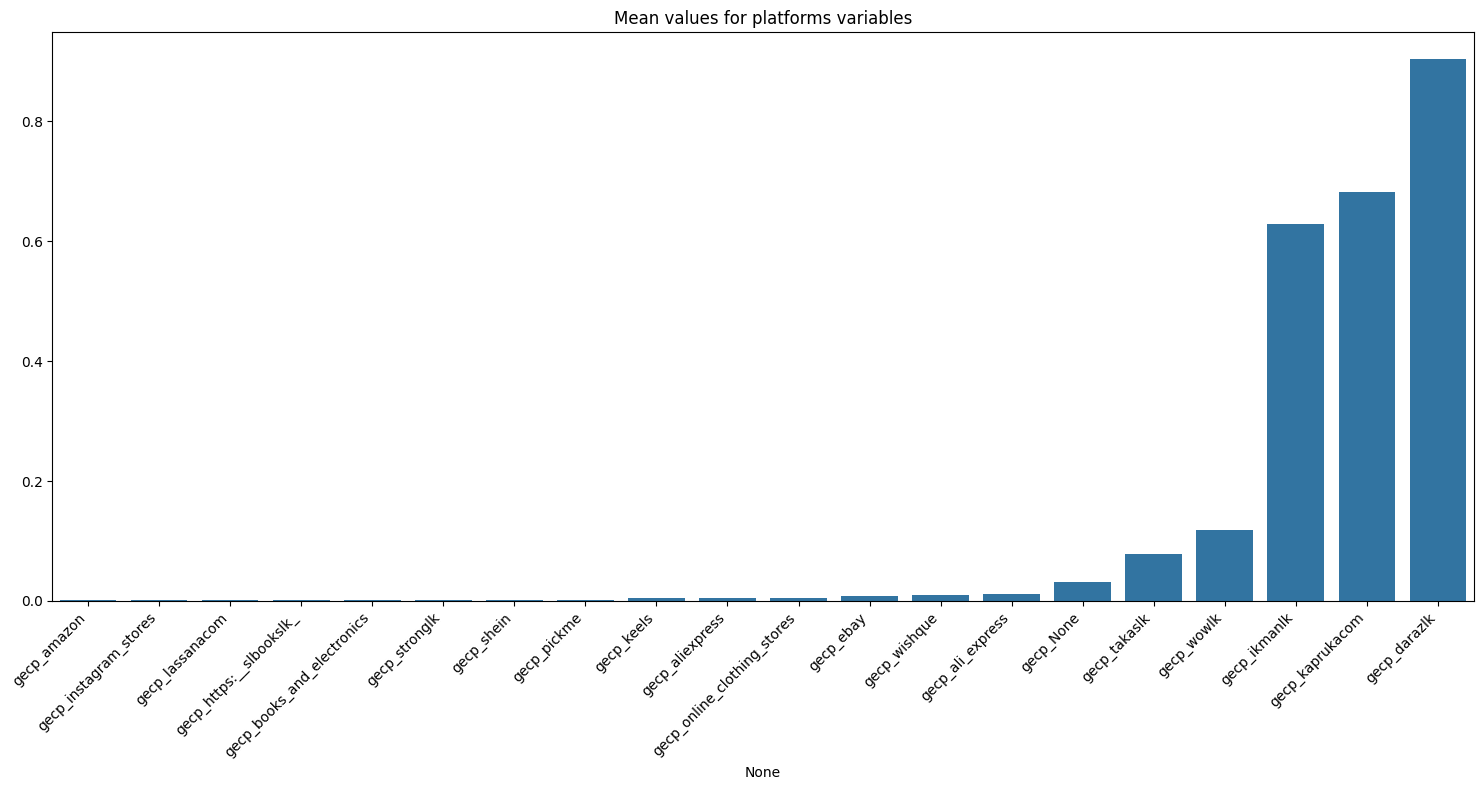

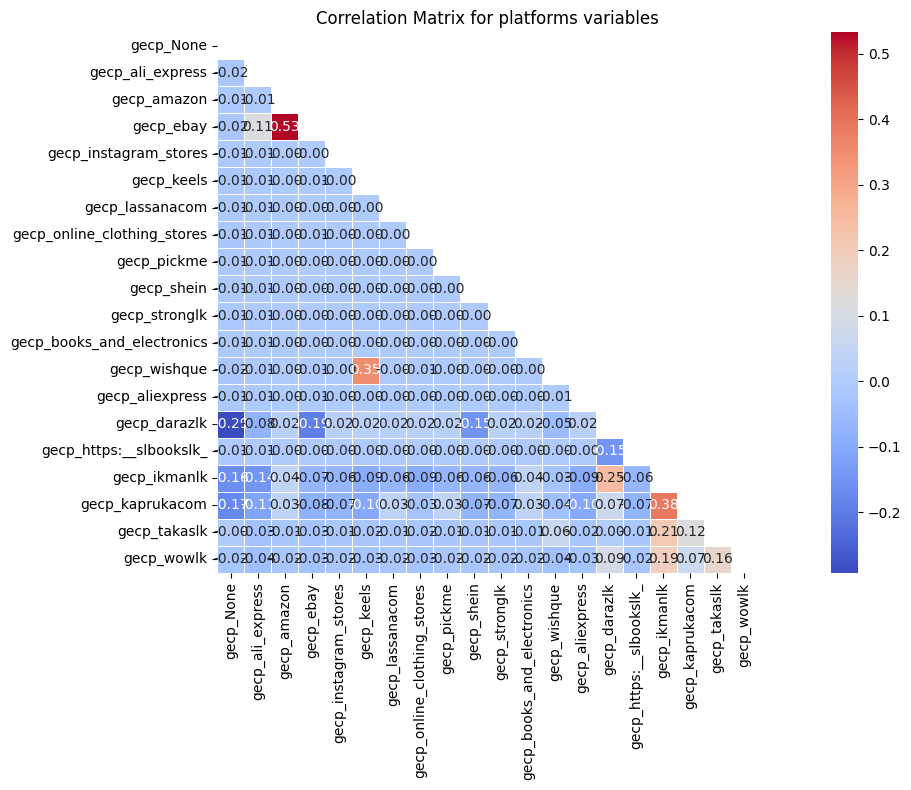

Analyzing ONLINE_PHARMACY construct with 9 variables

Summary Statistics:
                     count      mean       std  min  25%  50%  75%  max  \
op_nearby            825.0  0.167273  0.373446  0.0  0.0  0.0  0.0  1.0   
op_pharmacy          825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
op_union_chemist     825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
op_ceymedlk          825.0  0.090909  0.287654  0.0  0.0  0.0  0.0  1.0   
op_epharmalk         825.0  0.073939  0.261831  0.0  0.0  0.0  0.0  1.0   
op_healthgurdlk      825.0  0.215758  0.411596  0.0  0.0  0.0  0.0  1.0   
op_healthnetlk       825.0  0.115152  0.319398  0.0  0.0  0.0  0.0  1.0   
op_onlinepharmacylk  825.0  0.288485  0.453333  0.0  0.0  0.0  1.0  1.0   
op_None              825.0  0.345455  0.475805  0.0  0.0  0.0  1.0  1.0   

                     missing  missing_pct  
op_nearby                  0          0.0  
op_pharmacy                0          0.0  
op_union_chemist           0          0.0  

<Figure size 1500x800 with 0 Axes>

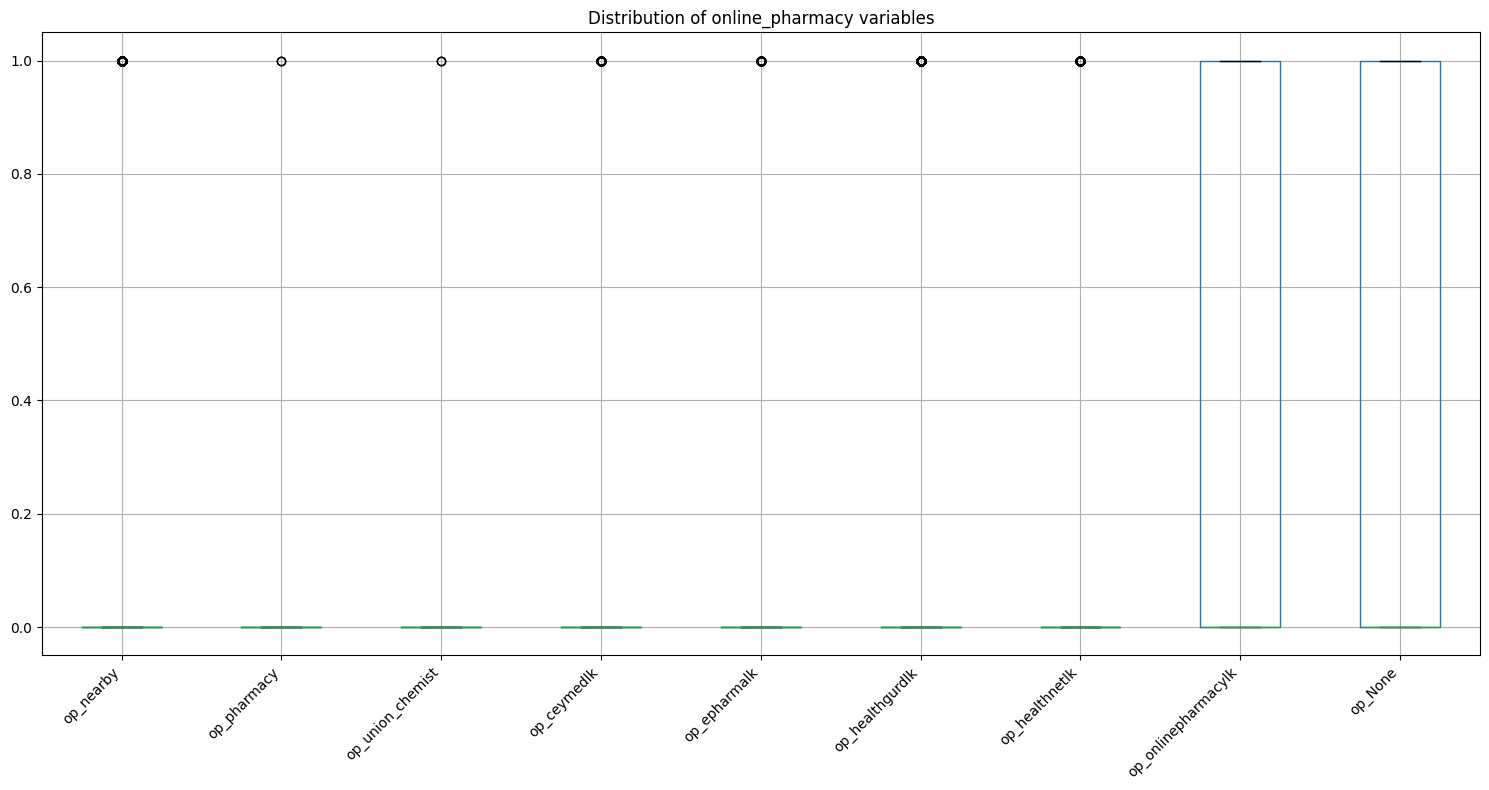

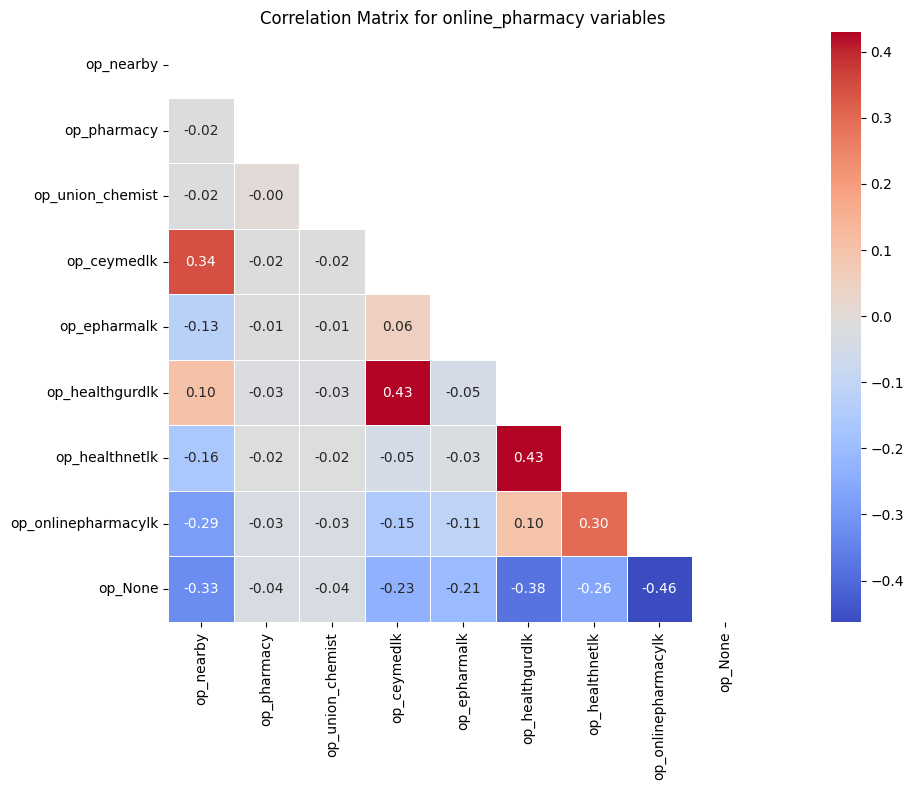

Analyzing FASHION_BRANDS construct with 25 variables

Summary Statistics:
                                count      mean       std  min  25%  50%  75%  \
fabr_amanthe                    825.0  0.001212  0.034816  0.0  0.0  0.0  0.0   
fabr_carlo_clothing             825.0  0.001212  0.034816  0.0  0.0  0.0  0.0   
fabr_chenara_dodge              825.0  0.004848  0.069504  0.0  0.0  0.0  0.0   
fabr_didn’t_used                825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
fabr_gflock                     825.0  0.099394  0.299372  0.0  0.0  0.0  0.0   
fabr_kynd_fashion               825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
fabr_kelly_felder               825.0  0.141818  0.349075  0.0  0.0  0.0  0.0   
fabr_moods                      825.0  0.001212  0.034816  0.0  0.0  0.0  0.0   
fabr_moose                      825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
fabr_nills                      825.0  0.002424  0.049207  0.0  0.0  0.0  0.0   
fabr_nolimitlk___gflocklk       825

<Figure size 1500x800 with 0 Axes>

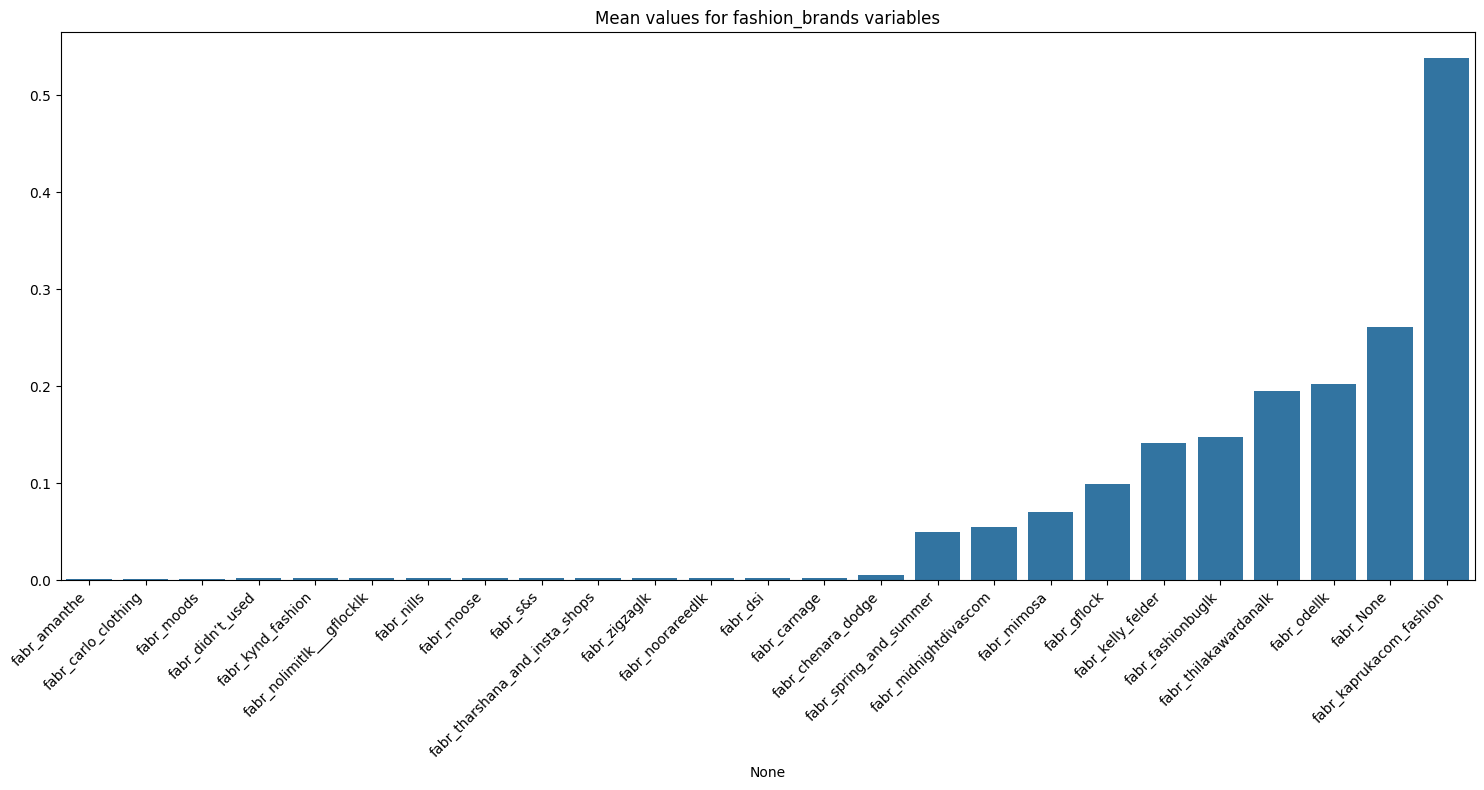

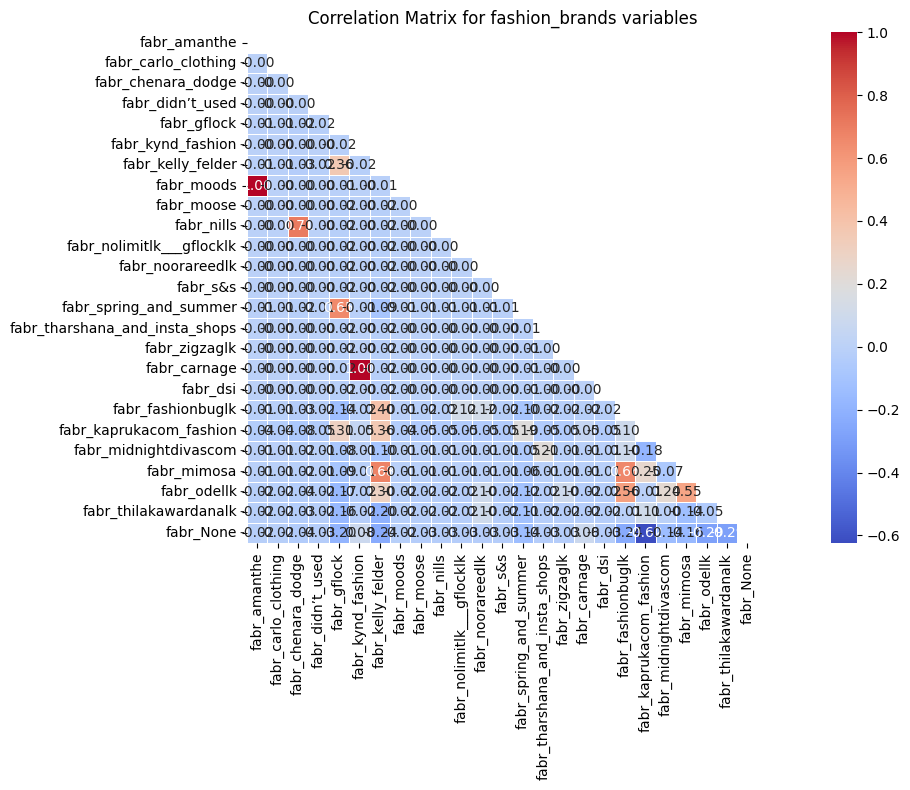

Analyzing GROCERY_DELIVERY construct with 11 variables

Summary Statistics:
                         count      mean       std  min  25%  50%  75%  max  \
gds_cargillis_food_city  825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
gds_cargillsonlinecom    825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
gds_glomark              825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
gds_keels                825.0  0.002424  0.049207  0.0  0.0  0.0  0.0  1.0   
gds_arpicolk             825.0  0.181818  0.385929  0.0  0.0  0.0  0.0  1.0   
gds_cinnamonhotelcom     825.0  0.018182  0.133690  0.0  0.0  0.0  0.0  1.0   
gds_glomarklk            825.0  0.004848  0.069504  0.0  0.0  0.0  0.0  1.0   
gds_keellssuperlk        825.0  0.673939  0.469054  0.0  0.0  1.0  1.0  1.0   
gds_pickmefoodscom       825.0  0.710303  0.453897  0.0  0.0  1.0  1.0  1.0   
gds_ubereatscom          825.0  0.809697  0.392778  0.0  1.0  1.0  1.0  1.0   
gds_None                 825.0  0.067879  0.251690  0.0

<Figure size 1500x800 with 0 Axes>

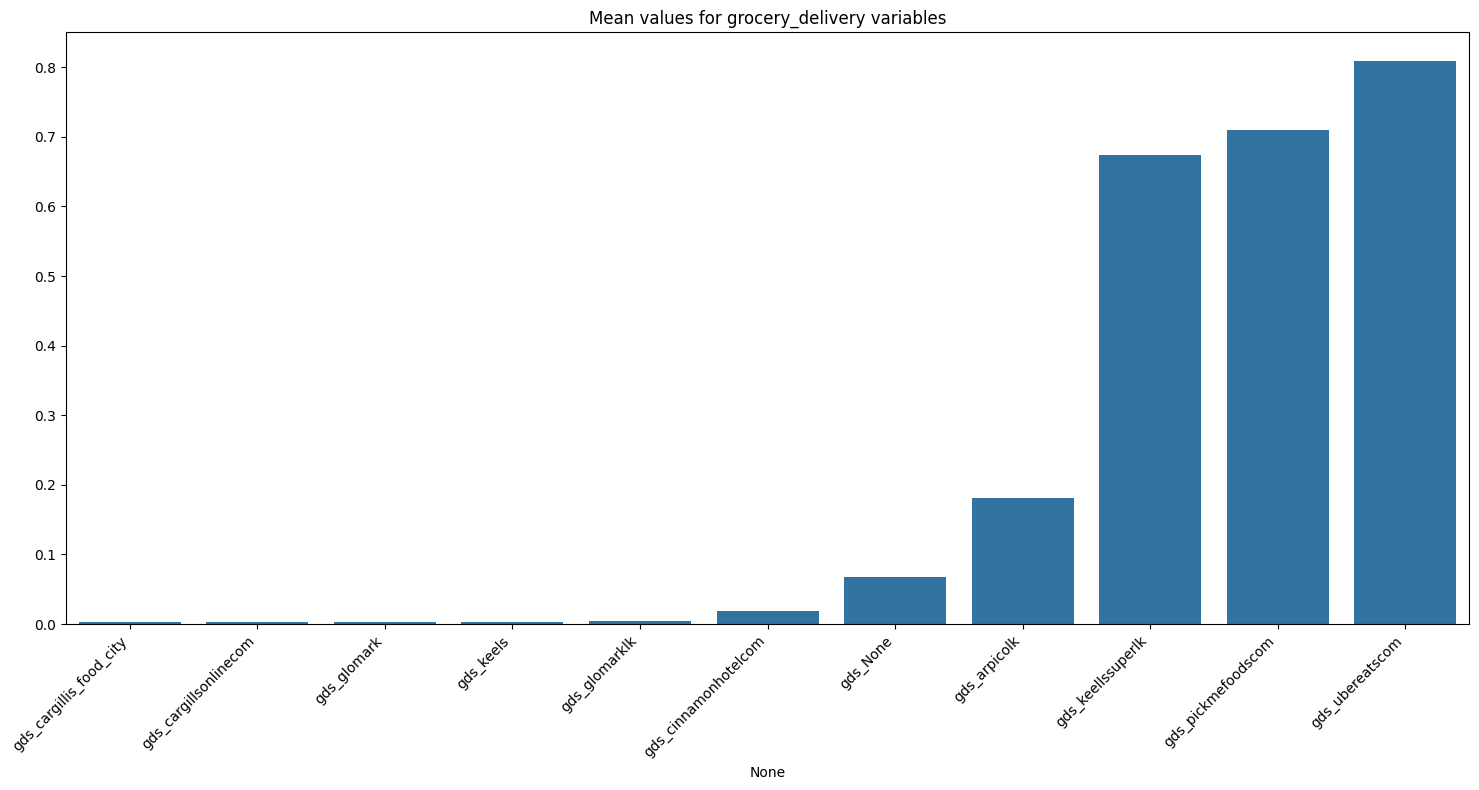

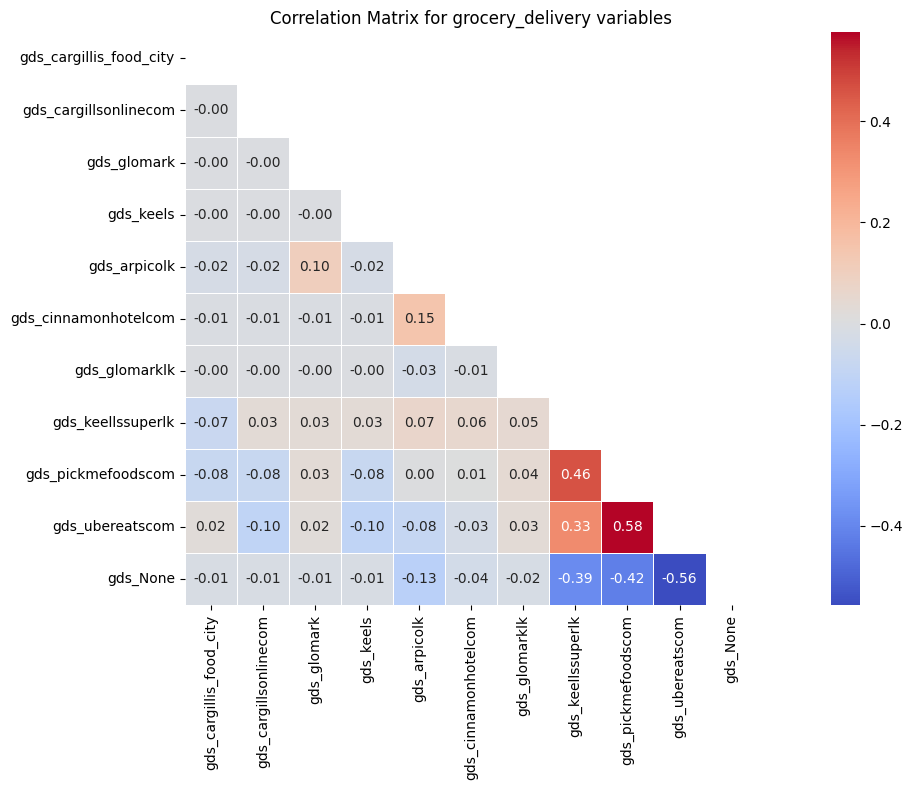

Analyzing AUTOMOBILE construct with 9 variables

Summary Statistics:
                                 count      mean       std  min  25%  50%  \
sos_automobile_ikmanlk           825.0  0.058182  0.234229  0.0  0.0  0.0   
sos_automobile_toyota            825.0  0.002424  0.049207  0.0  0.0  0.0   
sos_automobile_amazon            825.0  0.014545  0.119797  0.0  0.0  0.0   
sos_automobile_autolankacom      825.0  0.287273  0.452764  0.0  0.0  0.0   
sos_automobile_lankavechiclecom  825.0  0.040000  0.196078  0.0  0.0  0.0   
sos_automobile_patpatlk          825.0  0.231515  0.422057  0.0  0.0  0.0   
sos_automobile_pricelankalk      825.0  0.132121  0.338828  0.0  0.0  0.0   
sos_automobile_riyasewanalk      825.0  0.414545  0.492942  0.0  0.0  0.0   
sos_automobile_None              825.0  0.280000  0.449271  0.0  0.0  0.0   

                                 75%  max  missing  missing_pct  
sos_automobile_ikmanlk           0.0  1.0        0          0.0  
sos_automobile_toyota       

<Figure size 1500x800 with 0 Axes>

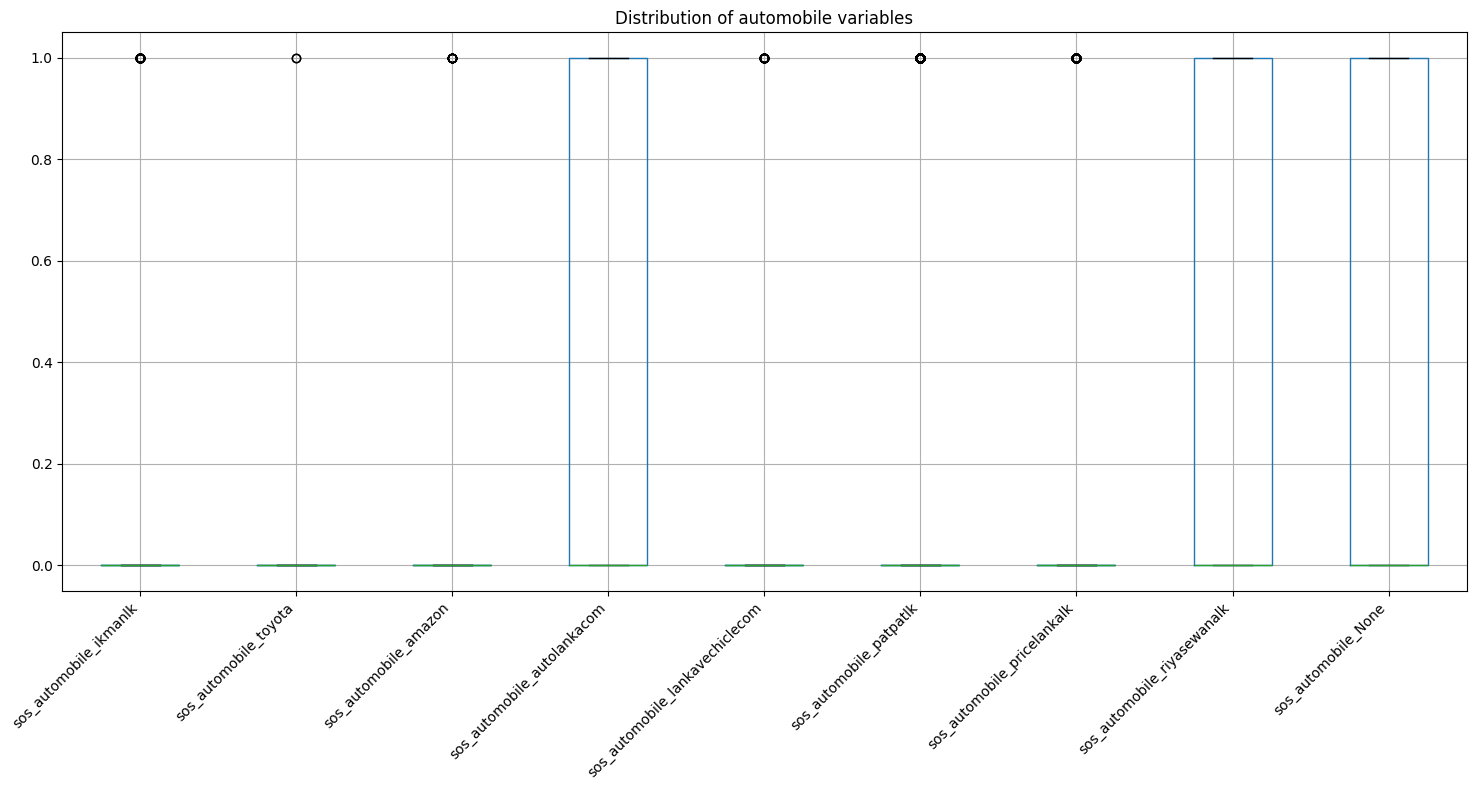

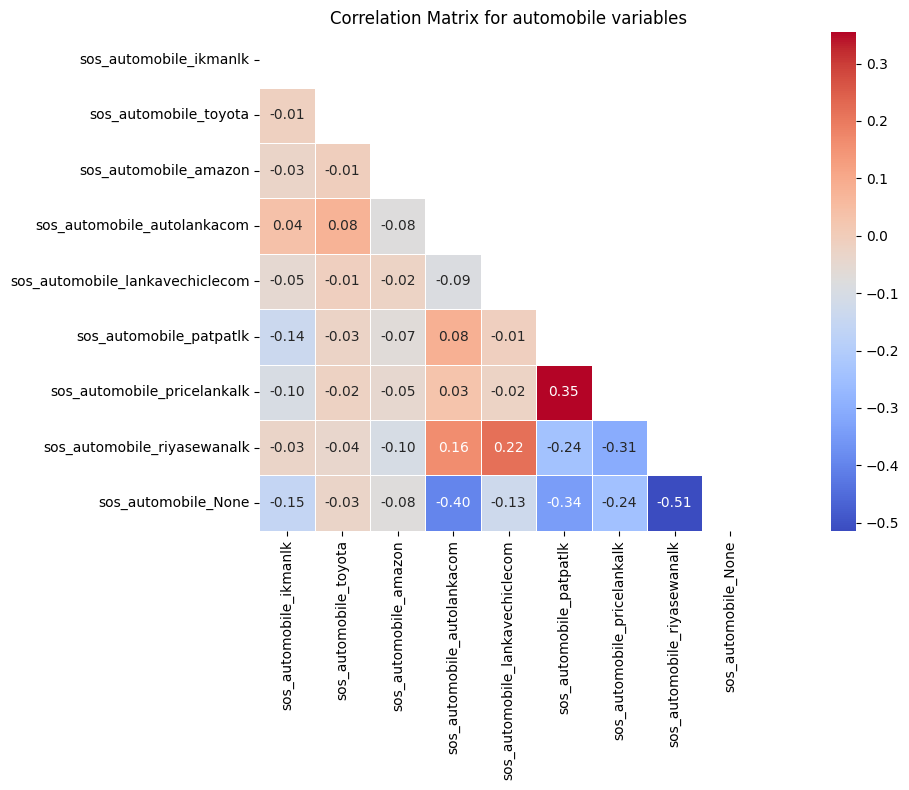

Analyzing DEMOGRAPHIC construct with 11 variables

Summary Statistics:
                                   count      mean       std  min  25%  50%  \
gender_encoded                     825.0  0.339394  0.483928  0.0  0.0  0.0   
age_encoded                        825.0  0.890909  0.475341  0.0  1.0  1.0   
marital_status_encoded             825.0  0.488485  0.500171  0.0  0.0  0.0   
education_encoded                  825.0  3.961212  0.974654  0.0  4.0  4.0   
used_online_shopping_encoded       825.0  0.996364  0.060229  0.0  1.0  1.0   
prof_employed_(full_time)          825.0  0.776970  0.416531  0.0  1.0  1.0   
prof_employed_(part_time)          825.0  0.012121  0.109493  0.0  0.0  0.0   
prof_jobless                       825.0  0.002424  0.049207  0.0  0.0  0.0   
prof_self_employed___entrepreneur  825.0  0.044848  0.207097  0.0  0.0  0.0   
prof_student                       825.0  0.162424  0.369063  0.0  0.0  0.0   
prof_unemployed                    825.0  0.001212  0.034816

<Figure size 1500x800 with 0 Axes>

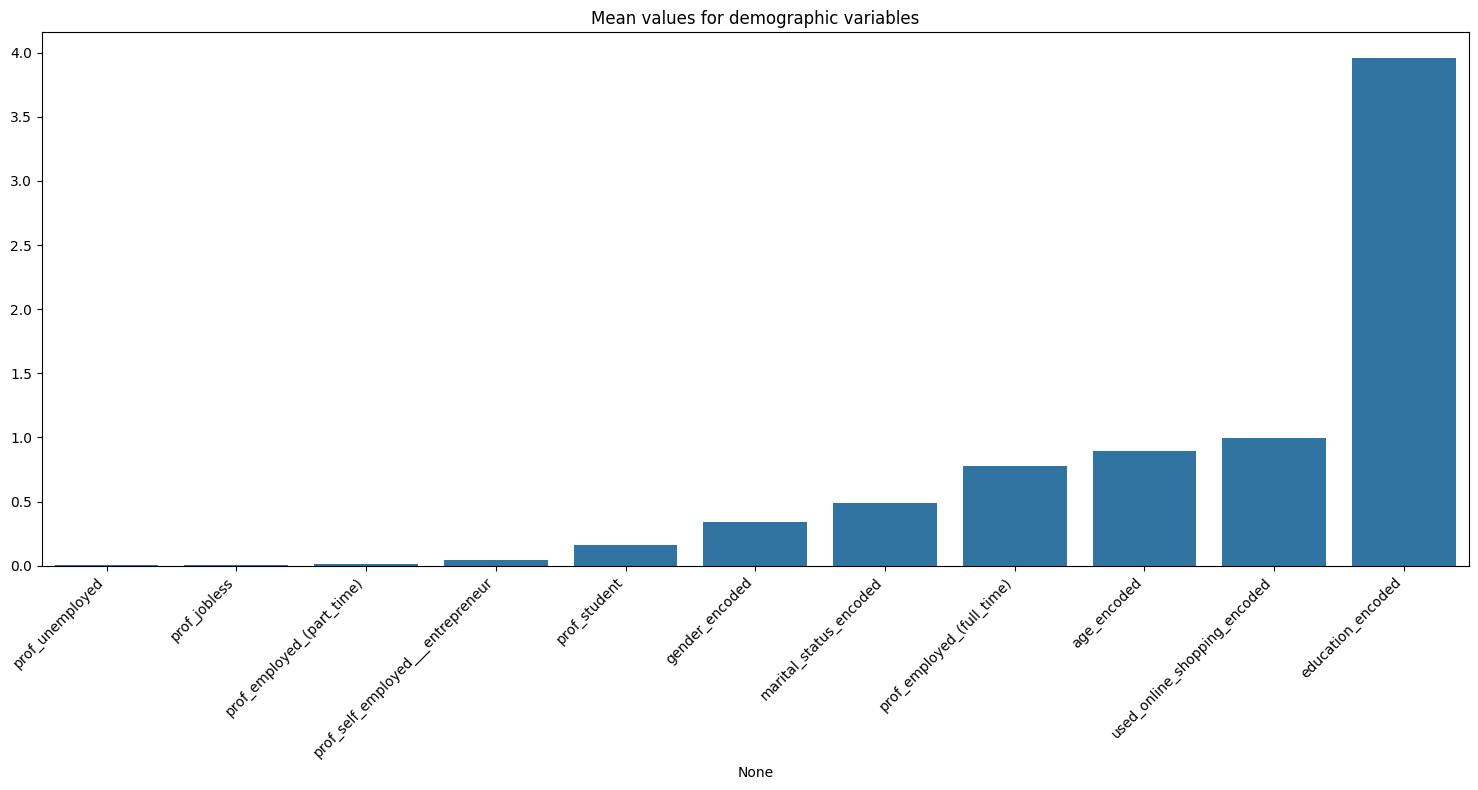

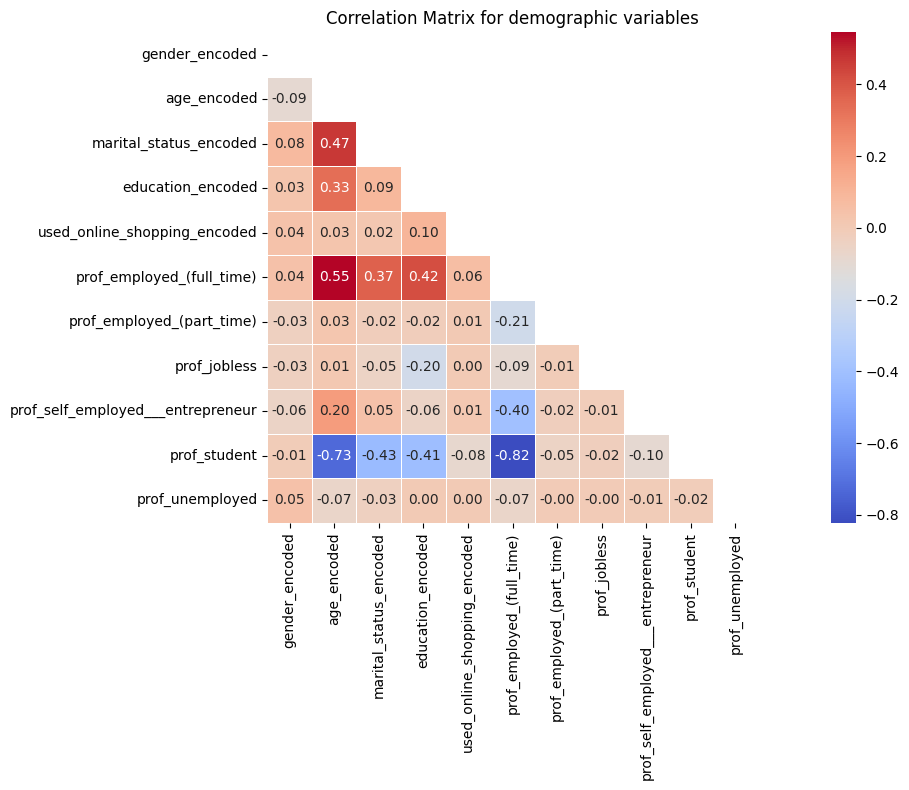

In [23]:
for construct_name, columns in constructs.items():
    if len(columns) > 0:  # Only analyze non-empty constructs
        analyze_construct(df, construct_name, columns)

#### PEOU (Perceived Ease of Use) Analysis Insights

The analysis of PEOU variables reveals that respondents generally find online shopping platforms moderately easy to use, with navigation features receiving the most positive ratings. However, there are clear opportunities for improvement in error handling and system response time, which received lower ratings.

Key findings:
- Navigation features are perceived most positively (means ≈ 3.5)
- Response time and error handling received the lowest ratings (means < 3.0)
- Consistent but moderate variability across ratings suggests general consensus among users
- The overall moderate ratings (most means between 3.0-3.5) indicate that while platforms are considered usable, there's substantial room for improvement

These findings suggest that e-commerce platforms should prioritize improving error recovery mechanisms and system responsiveness to enhance user experience and potentially increase purchase intention.

#### Perceived Usefulness (PU) Analysis Insights

The analysis of PU variables reveals that respondents find online shopping platforms most useful for their convenience benefits, while cost savings and information quality are perceived as less valuable features.

Key findings:
- Convenience aspects received the highest ratings (means > 3.6), highlighting the primary value proposition of online shopping
- Product-related features were rated moderately positive (means ≈ 3.3-3.4)
- Cost benefits and information quality received the lowest ratings (means ≈ 3.1-3.2), suggesting potential areas for improvement
- Higher variability in convenience ratings indicates diverse opinions about this aspect
- The overall positive ratings across all PU dimensions (all means > 3.0) suggest that users generally recognize the usefulness of online shopping platforms

These findings suggest that e-commerce platforms should emphasize convenience in their marketing while working to improve perceived cost benefits and information quality to enhance overall perceived usefulness.

#### Structural Assurance (SA) Analysis Insights

The analysis of SA variables reveals that respondents have moderate confidence in the security and trust measures of online shopping platforms, with payment security receiving the highest trust ratings and policy implementation receiving the lowest.

Key findings:
- Payment security aspects are rated most positively (means ≈ 3.31), indicating relative confidence in transaction processes
- Privacy protection measures received moderate ratings (means ≈ 3.12-3.17)
- Policy implementation received the lowest ratings (means ≈ 3.09-3.15), suggesting skepticism about adherence to stated policies
- Consistent standard deviations across all SA variables indicate uniform levels of agreement among respondents
- The moderately positive but cautious ratings (most means just above 3.0) suggest that trust and security remain concerns for many users

These findings suggest that while e-commerce platforms have established basic trust in their payment systems, there are opportunities to improve user confidence in privacy protection and policy implementation, which could potentially increase purchase intention.

#### Social Influence (SI) Analysis Insights

The analysis of SI variables reveals that social factors have varying degrees of influence on online purchase decisions, with product reviews and word-of-mouth recommendations being the most influential, while normative social pressure has the least impact.

Key findings:
- Product reviews are the most influential social factor (means of 3.58-3.76), followed by word-of-mouth recommendations (means of 3.51-3.52)
- Social media also plays a significant role in shaping purchase decisions (means of 3.42-3.49)
- Direct normative social pressure is the least influential factor (means of 2.84-3.16), suggesting consumers value informational influence over conformity pressure
- Higher variability in ratings for reviews and social media indicates diverse opinions about these influences
- Strong correlations between paired items for each type of social influence suggest these are reliable measurements of distinct social influence mechanisms

These findings suggest that e-commerce platforms should prioritize robust review systems and social sharing features while also leveraging word-of-mouth through referral programs to maximize social influence on purchase decisions.

#### Attitude (ATT) Analysis Insights

The analysis of ATT variables reveals that respondents generally have very positive attitudes toward online shopping, which is likely a strong predictor of purchase intention.

Key findings:
- Attitude ratings are among the highest of all constructs (means of 3.83 and 3.88)
- Most respondents rated their attitude as positive or very positive (median of 4.0 for both variables)
- Relatively low variability in attitudes suggests a consensus about the positive perception of online shopping
- The moderate correlation between attitude variables (0.35) indicates they capture different but related aspects of overall attitude

These findings align with expectation theory, suggesting that positive attitudes toward online shopping are well-established among consumers and likely serve as a critical mediating factor between other constructs (such as PEOU, PU, SA) and purchase intention.

#### Perceived Risk (RISK) Analysis Insights

The analysis of RISK variables reveals that respondents have significant concerns about security and product authenticity when shopping online, which could be major inhibitors of purchase intention despite positive attitudes.

Key findings:
- Security risk received the highest mean rating (3.97) of any variable in the dataset, highlighting it as the primary concern for online shoppers
- Product authenticity concerns are also substantial (mean of 3.78), though slightly less pronounced than security concerns
- The distribution of risk ratings is skewed toward higher values (4-5), indicating that these are widespread concerns
- The moderate correlation (0.30) between security and authenticity risks indicates these are distinct aspects of risk that need to be addressed separately
- Both risk variables have among the highest means across all constructs, suggesting risk perception could be a critical barrier to online purchasing

These findings suggest that e-commerce platforms need to prioritize security measures and authentication guarantees to overcome risk perceptions that might otherwise prevent consumers from completing purchases despite positive attitudes toward online shopping.

#### Online Purchase Intention (OPI) Analysis Insights

The analysis of OPI variables reveals that respondents have strong positive intentions toward online shopping, with particularly high ratings for behavior change intention.

Key findings:
- High mean scores across all OPI variables (3.7-3.9 out of 5) indicate strong positive intentions toward online shopping
- Behavior change intention received the highest rating (mean = 3.90), suggesting respondents are actively considering shifting to online shopping
- Nearly 97% of respondents have already made an online purchase, indicating high adoption of online shopping
- Strong correlation (0.84) between behavior change and convenience perceptions suggests these factors are closely linked
- Satisfaction appears to measure a distinct aspect of online shopping, with minimal correlation to other OPI variables

These findings suggest that online retailers should focus on enhancing the convenience aspects of their platforms, as this strongly relates to behavioral intentions. The high adoption rate also indicates that marketing strategies should focus on increasing purchase frequency and basket size rather than initial adoption.

#### E-Commerce Platform Usage Analysis Insights

The analysis of platform usage reveals a highly concentrated market dominated by three major platforms, with most specialized platforms struggling to gain significant traction.

Key findings:
- Three platforms dominate the market: Daraz.lk (90.3% usage), Kapruka.com (68.1% usage), and Ikman.lk (62.9% usage)
- Secondary platforms like Wow.lk (11.8%) and Takas.lk (7.9%) have moderate adoption
- The vast majority of other platforms have usage rates below 1%, indicating significant market concentration
- Only 3.2% of respondents don't use any listed platforms, confirming high e-commerce adoption
- Limited correlations between platform usage suggest users tend to gravitate toward a few preferred platforms rather than using many different ones

These findings suggest that network effects and first-mover advantages may be creating significant barriers to entry in the e-commerce market. New entrants may need to focus on highly specialized niches or distinctive value propositions to compete with established platforms.

#### Online Pharmacy Platform Usage Analysis Insights

The analysis of online pharmacy platform usage reveals a less mature but growing market with more balanced competition compared to general e-commerce.

Key findings:
- 34.5% of respondents don't use any online pharmacy platform, indicating significant growth potential
- OnlinePharmacy.lk leads the market with 28.8% usage, followed by Healthgurd.lk (21.6%)
- The market is less concentrated than general e-commerce, with more balanced distribution among competitors
- Negative correlation (-0.29) between nearby pharmacy usage and online platform usage suggests these serve different consumer segments
- Positive correlations between certain health-focused platforms indicate that early adopters may experiment with multiple services

These findings suggest that the online pharmacy market is still developing, with room for multiple players to grow. The significant percentage of non-users represents an opportunity for platforms that can address barriers to adoption, which may include concerns about medication authenticity, delivery reliability, and prescription handling.

### **Focus on specific columns**


Detailed analysis of focus columns:

Analyzing numeric column: opi_satisfaction


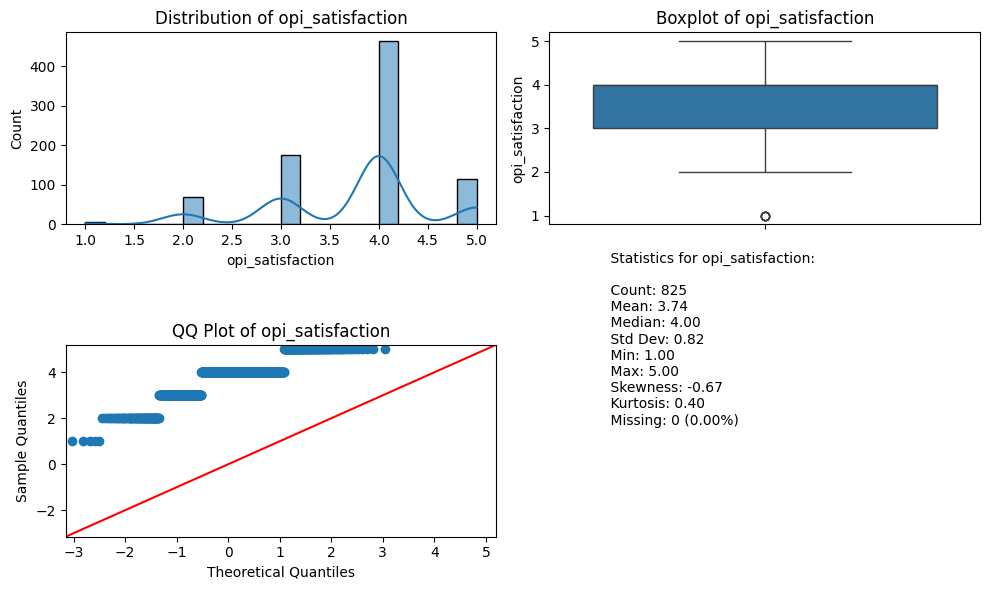

Potential outliers detected for opi_satisfaction: 5 values

Analyzing numeric column: opi_behavior_change


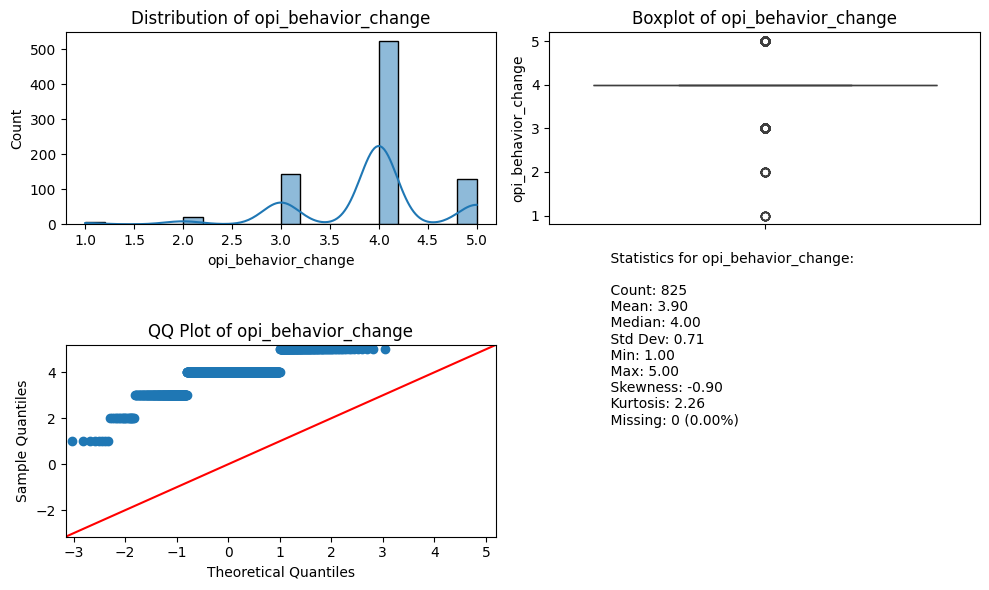

Potential outliers detected for opi_behavior_change: 303 values

Analyzing binary column: opi_purchased?


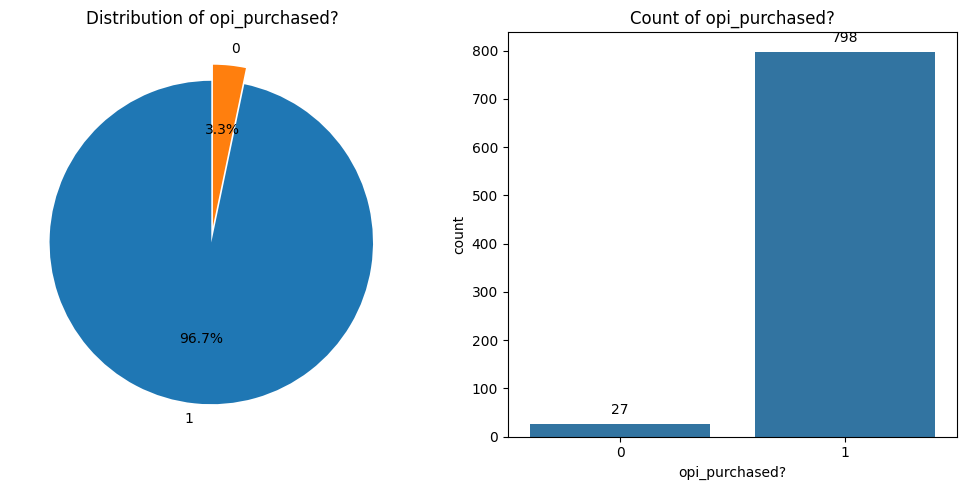


Statistics for opi_purchased?:
Total count: 825
Missing values: 0 (0.00%)

Frequency Table:
   Value  Count  Percentage
0      1    798       96.73
1      0     27        3.27

Analyzing numeric column: peou_navigation_1


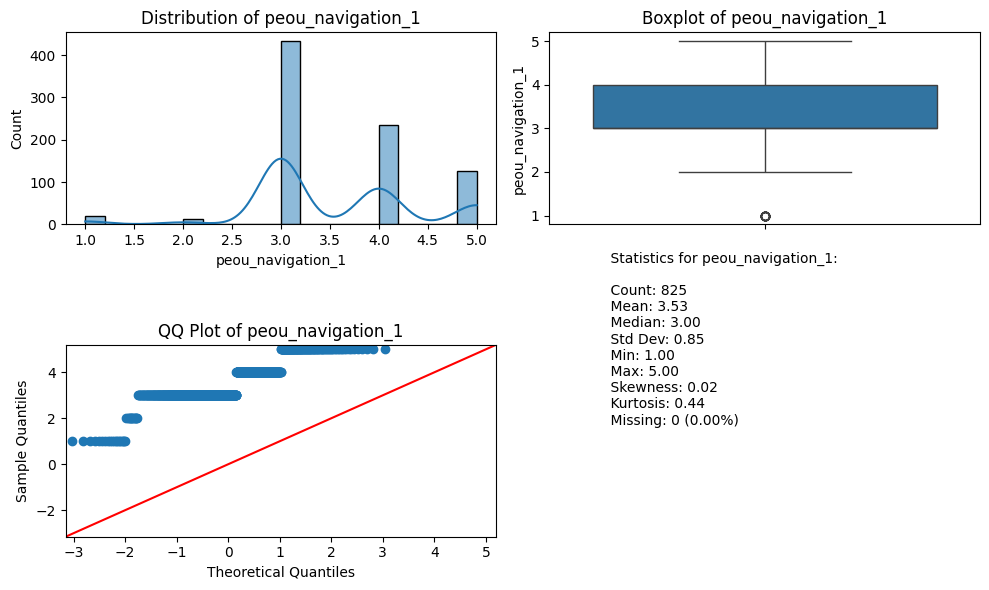

Potential outliers detected for peou_navigation_1: 19 values

Analyzing numeric column: pu_product_1


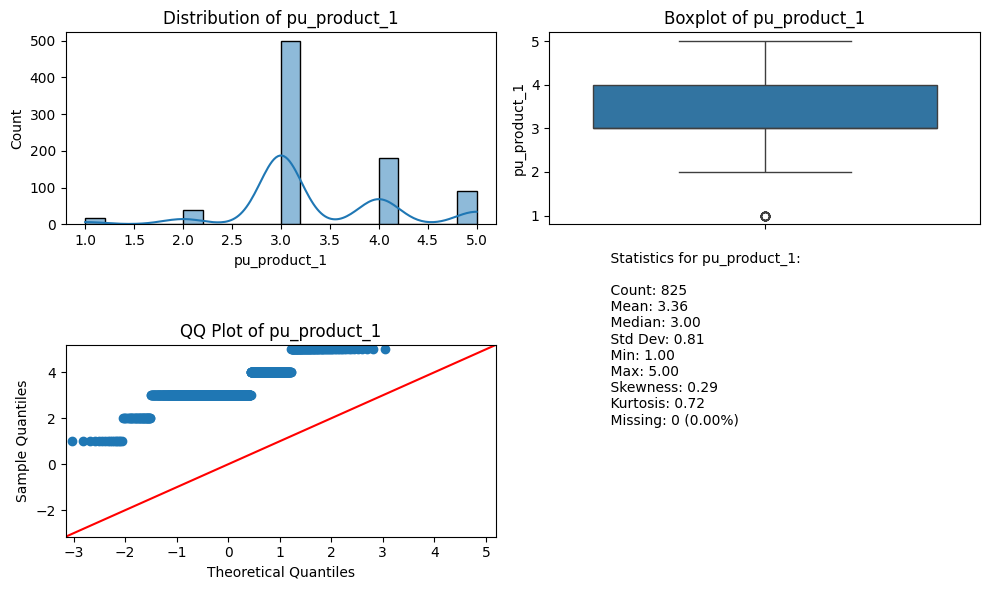

Potential outliers detected for pu_product_1: 16 values


In [24]:
if focus_columns:
    print("\nDetailed analysis of focus columns:")
    for col in focus_columns:
        if col in col_types['numeric']:
            print(f"\nAnalyzing numeric column: {col}")
            univariate_numeric(df, col)
        elif col in col_types['binary']:
            print(f"\nAnalyzing binary column: {col}")
            univariate_binary(df, col)
        elif col in col_types['categorical']:
            print(f"\nAnalyzing categorical column: {col}")
            univariate_categorical(df, col)

### **Relationship between outcome variables and key predictors**


Analyzing relationships between outcome variables and key predictors:


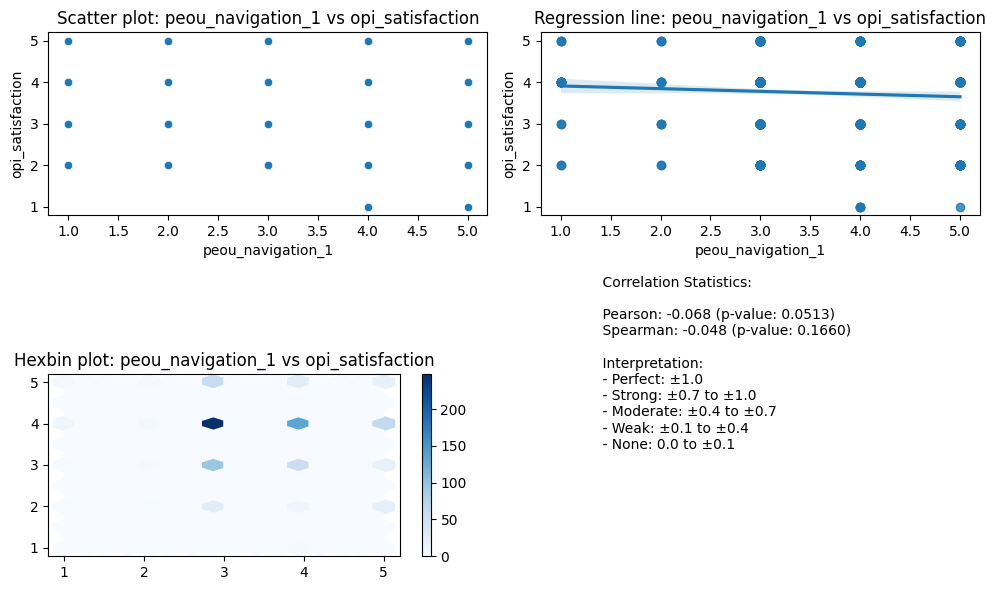


Relationship between peou_navigation_1 and opi_satisfaction:
There is a very weak or no negative correlation (-0.068) that is not statistically significant (p=0.0513).


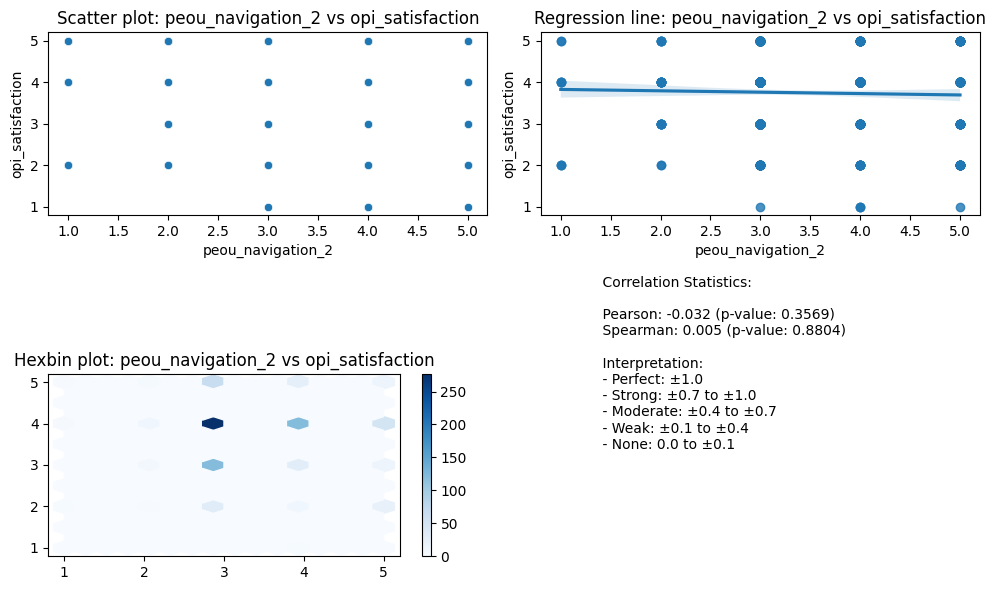


Relationship between peou_navigation_2 and opi_satisfaction:
There is a very weak or no negative correlation (-0.032) that is not statistically significant (p=0.3569).


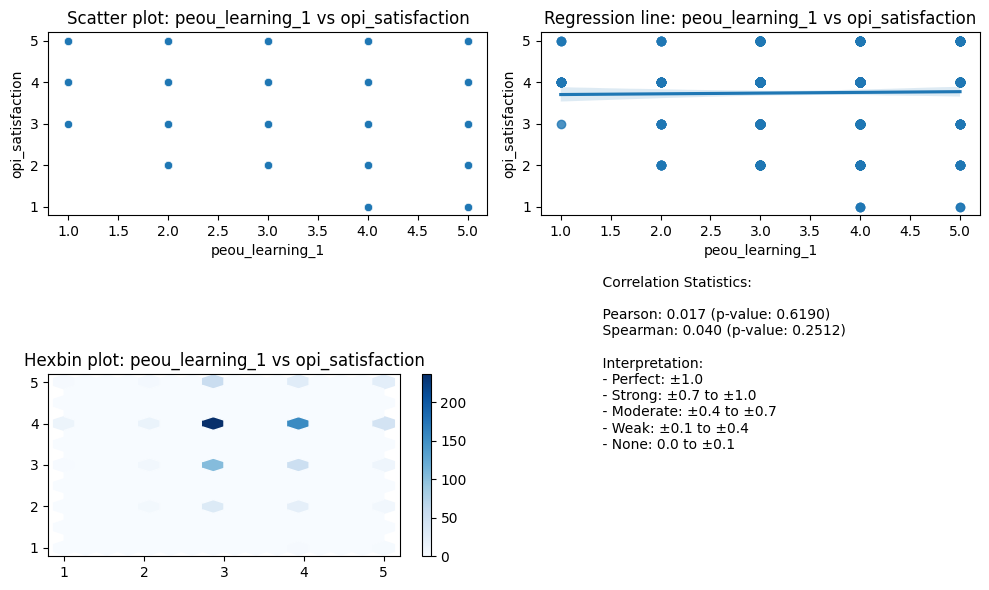


Relationship between peou_learning_1 and opi_satisfaction:
There is a very weak or no positive correlation (0.017) that is not statistically significant (p=0.6190).


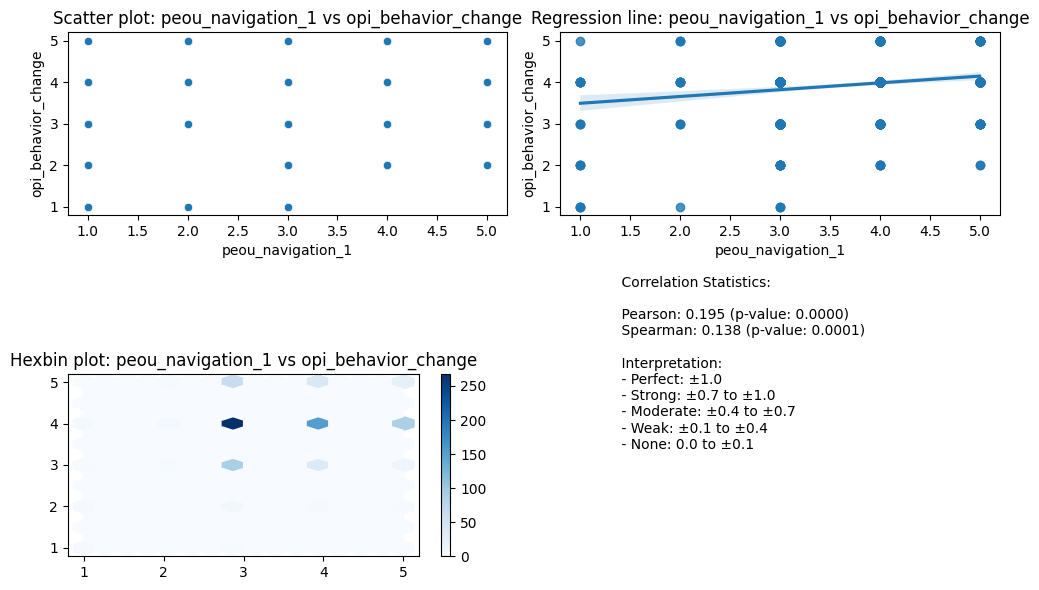


Relationship between peou_navigation_1 and opi_behavior_change:
There is a weak positive correlation (0.195) that is statistically significant (p=0.0000).


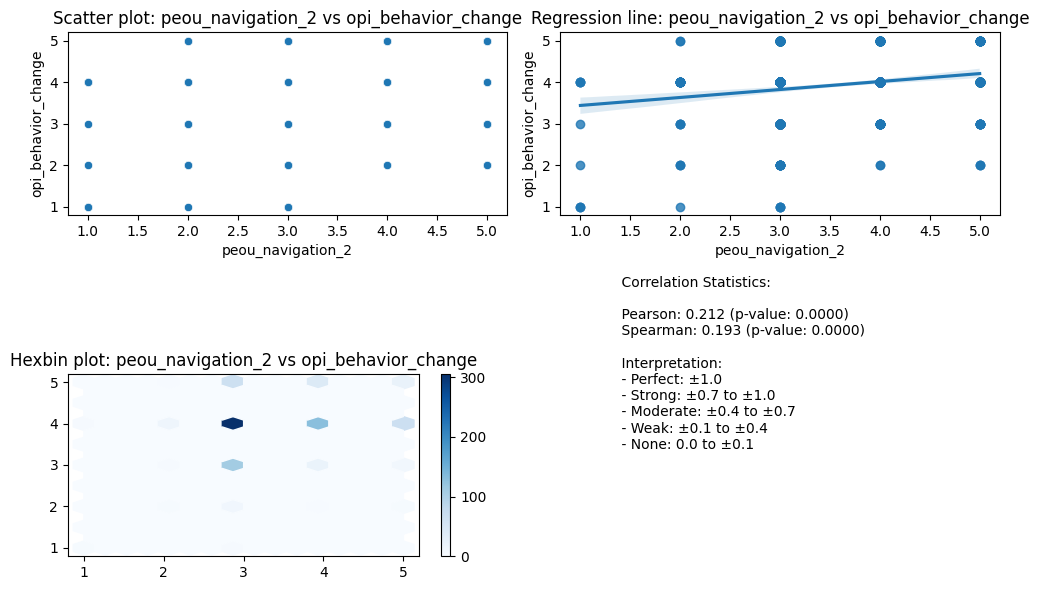


Relationship between peou_navigation_2 and opi_behavior_change:
There is a weak positive correlation (0.212) that is statistically significant (p=0.0000).


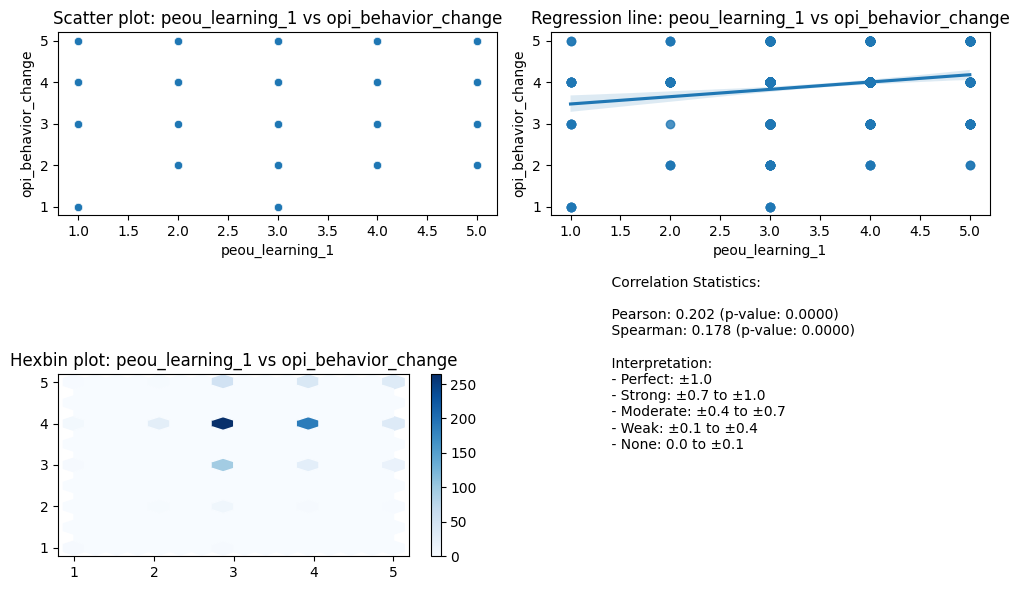


Relationship between peou_learning_1 and opi_behavior_change:
There is a weak positive correlation (0.202) that is statistically significant (p=0.0000).


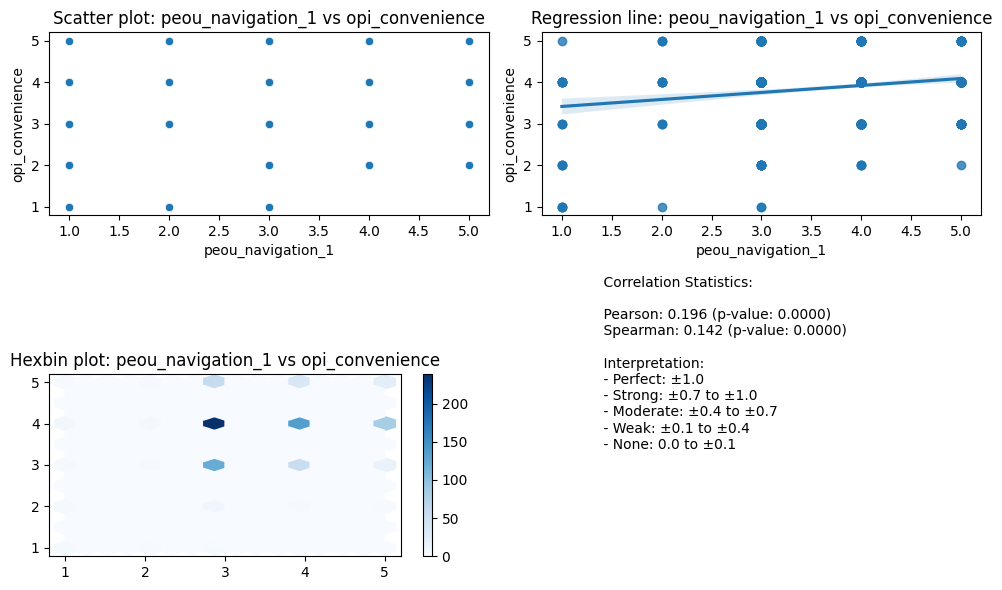


Relationship between peou_navigation_1 and opi_convenience:
There is a weak positive correlation (0.196) that is statistically significant (p=0.0000).


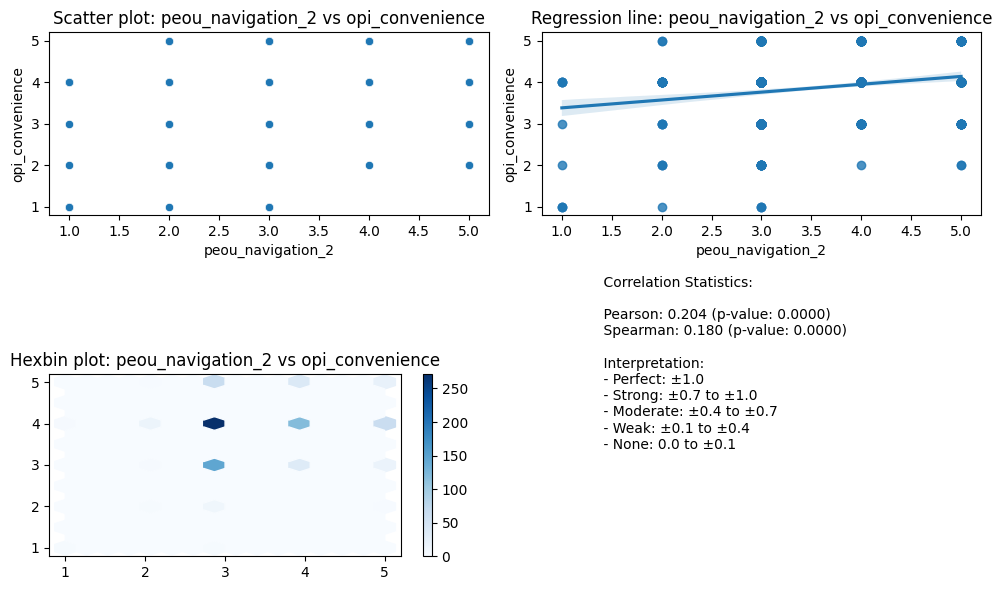


Relationship between peou_navigation_2 and opi_convenience:
There is a weak positive correlation (0.204) that is statistically significant (p=0.0000).


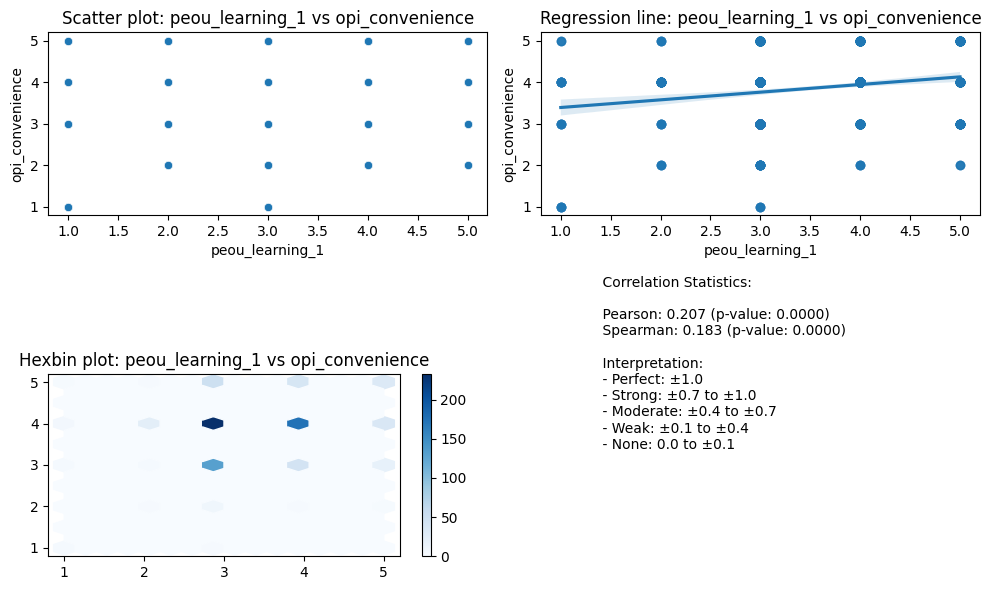


Relationship between peou_learning_1 and opi_convenience:
There is a weak positive correlation (0.207) that is statistically significant (p=0.0000).


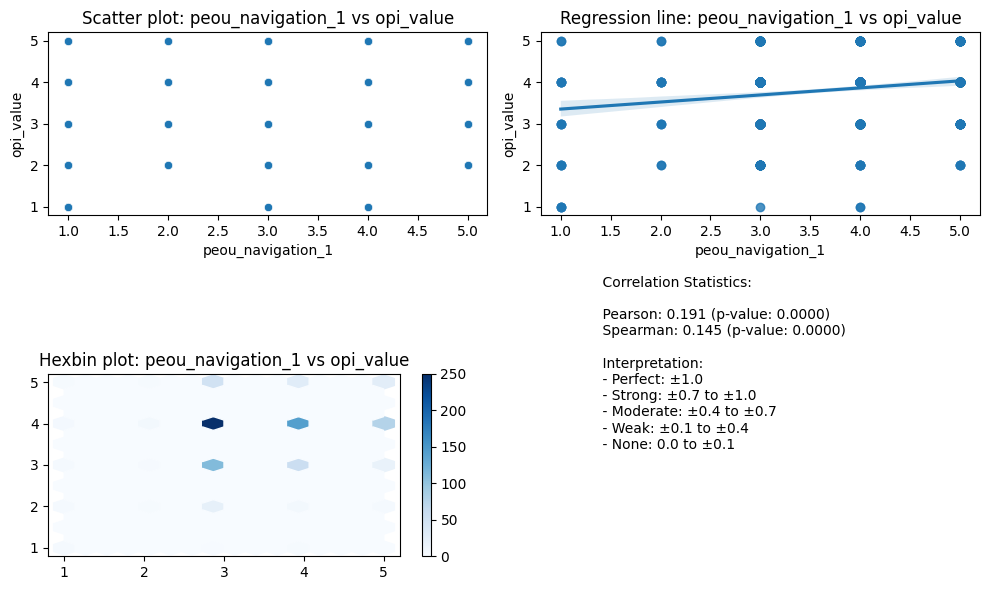


Relationship between peou_navigation_1 and opi_value:
There is a weak positive correlation (0.191) that is statistically significant (p=0.0000).


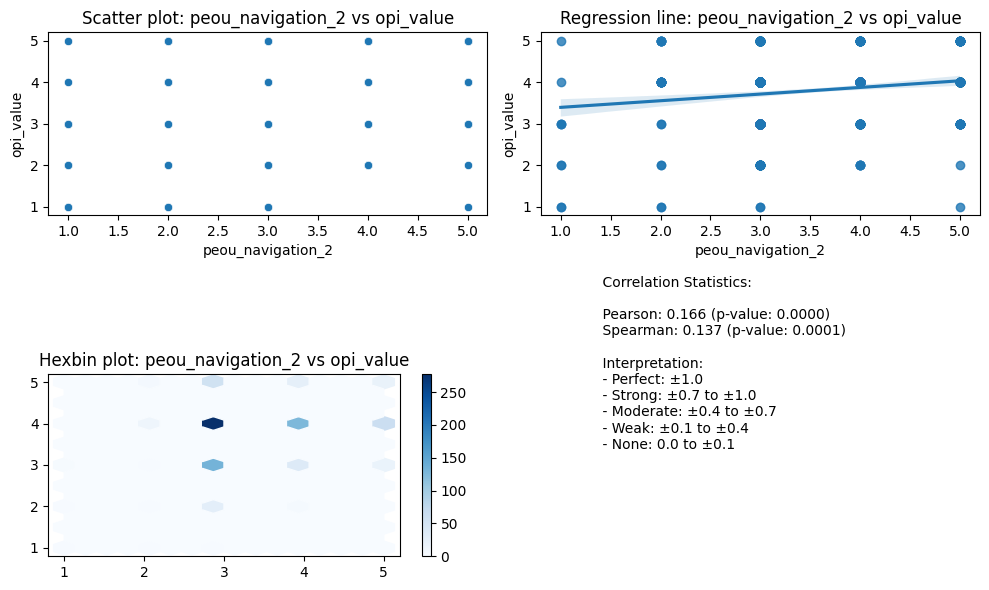


Relationship between peou_navigation_2 and opi_value:
There is a weak positive correlation (0.166) that is statistically significant (p=0.0000).


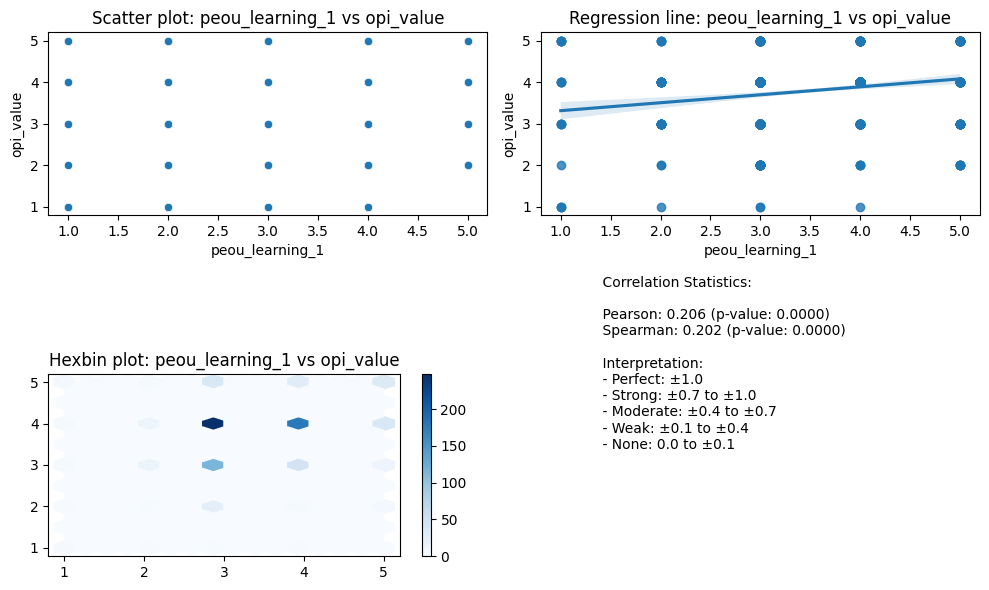


Relationship between peou_learning_1 and opi_value:
There is a weak positive correlation (0.206) that is statistically significant (p=0.0000).


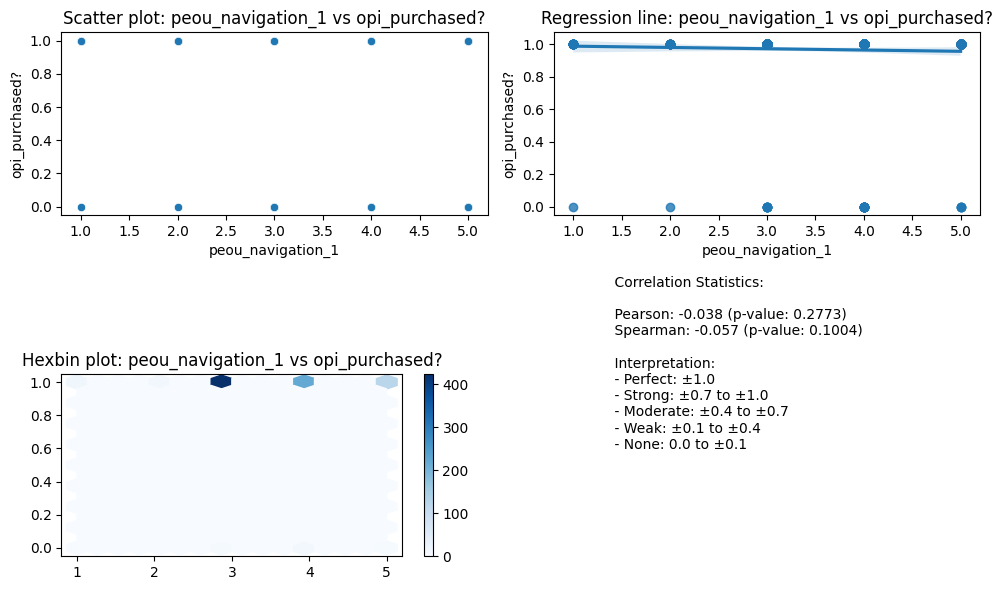


Relationship between peou_navigation_1 and opi_purchased?:
There is a very weak or no negative correlation (-0.038) that is not statistically significant (p=0.2773).


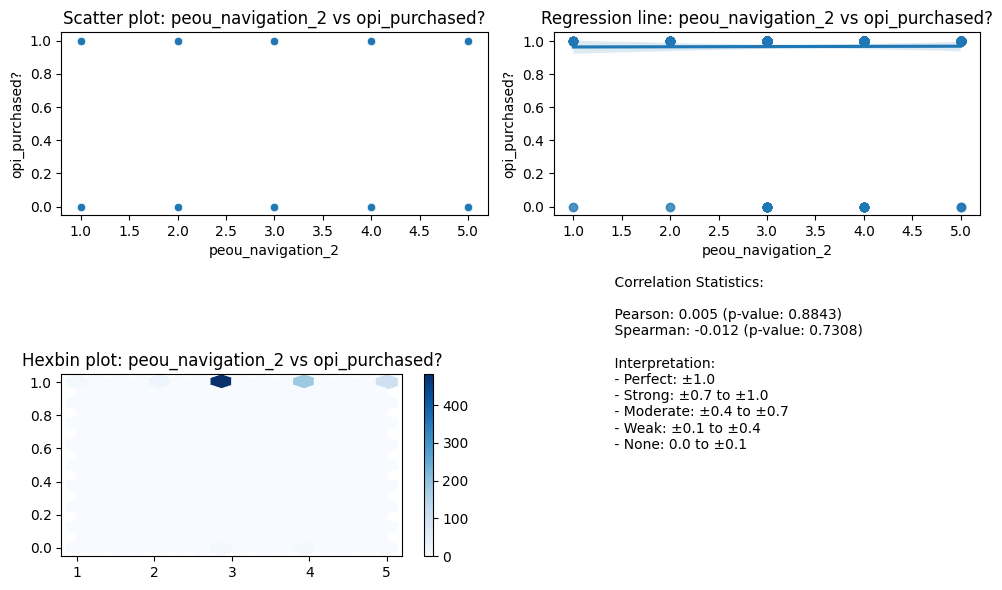


Relationship between peou_navigation_2 and opi_purchased?:
There is a very weak or no positive correlation (0.005) that is not statistically significant (p=0.8843).


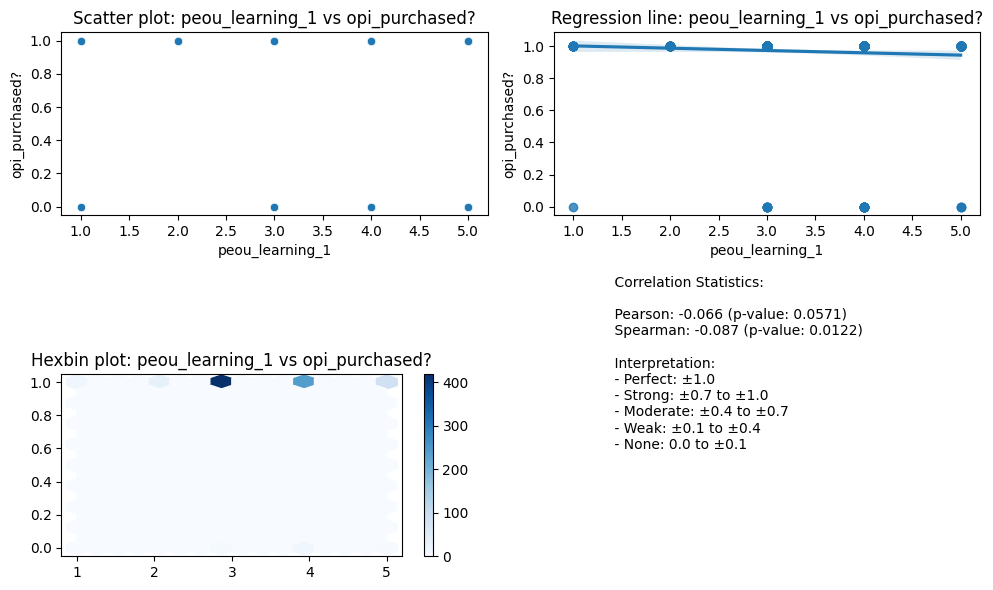


Relationship between peou_learning_1 and opi_purchased?:
There is a very weak or no negative correlation (-0.066) that is not statistically significant (p=0.0571).


In [25]:
print("\nAnalyzing relationships between outcome variables and key predictors:")
outcome_vars = [col for col in df.columns if col.startswith('opi_')]
key_predictors = constructs['peou'] + constructs['pu'] + constructs['sa'] + constructs['si'] + constructs['att'] + constructs['risk']
    
# Sample a few key relationships
for outcome in outcome_vars:
    for predictor in key_predictors[:3]:  # Limit to first 3 predictors for brevity
        bivariate_numeric_numeric(df, predictor, outcome)

### **Analyze purchase behavior**


ANALYZING PURCHASE BEHAVIOR DURING CRISIS
Online purchase rate during crisis: 96.73%


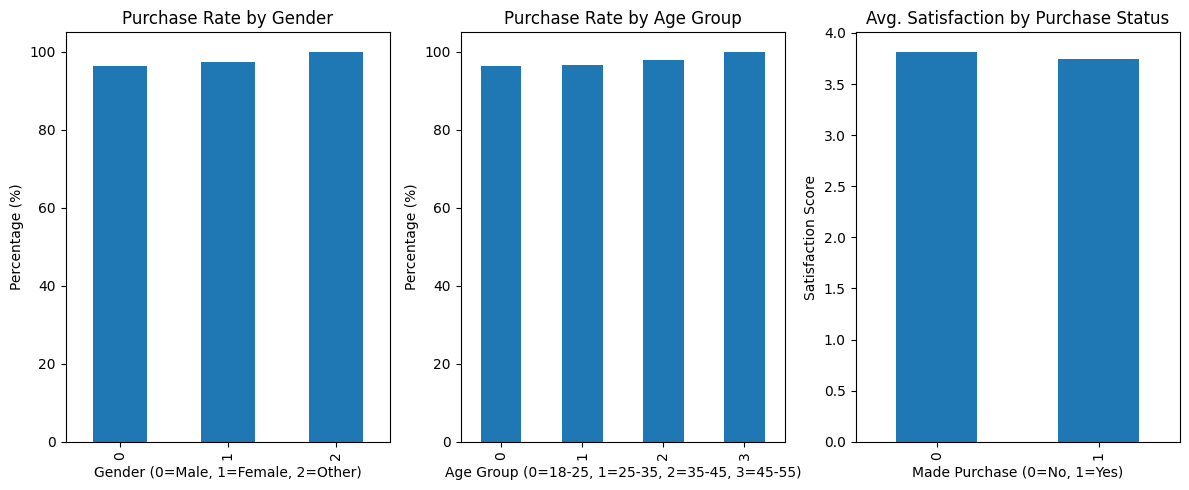


Key factors influencing purchase decision:
Could not build logistic regression model: error tokenizing input (maybe an unclosed string?)
    opi_purchased? ~ peou_avg + pu_avg + sa_avg + si_avg + att_avg + risk_avg + gender_encoded + age_encoded + education_encoded
                 ^


In [26]:
df = create_aggregate_features(df)
analyze_purchase_behavior(df)

### **Platform usage analysis**


ANALYZING PLATFORM USAGE PATTERNS

Distribution of platform_count:
count    825.000000
mean       2.473939
std        1.057618
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: platform_count, dtype: float64

Distribution of pharmacy_count:
count    825.000000
mean       0.956364
std        0.983128
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: pharmacy_count, dtype: float64

Distribution of fashion_count:
count    825.000000
mean       1.534545
std        1.408739
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: fashion_count, dtype: float64

Distribution of grocery_count:
count    825.000000
mean       2.408485
std        1.139185
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: grocery_count, dtype: float64

Distribution of automobile_count:
count    825.0

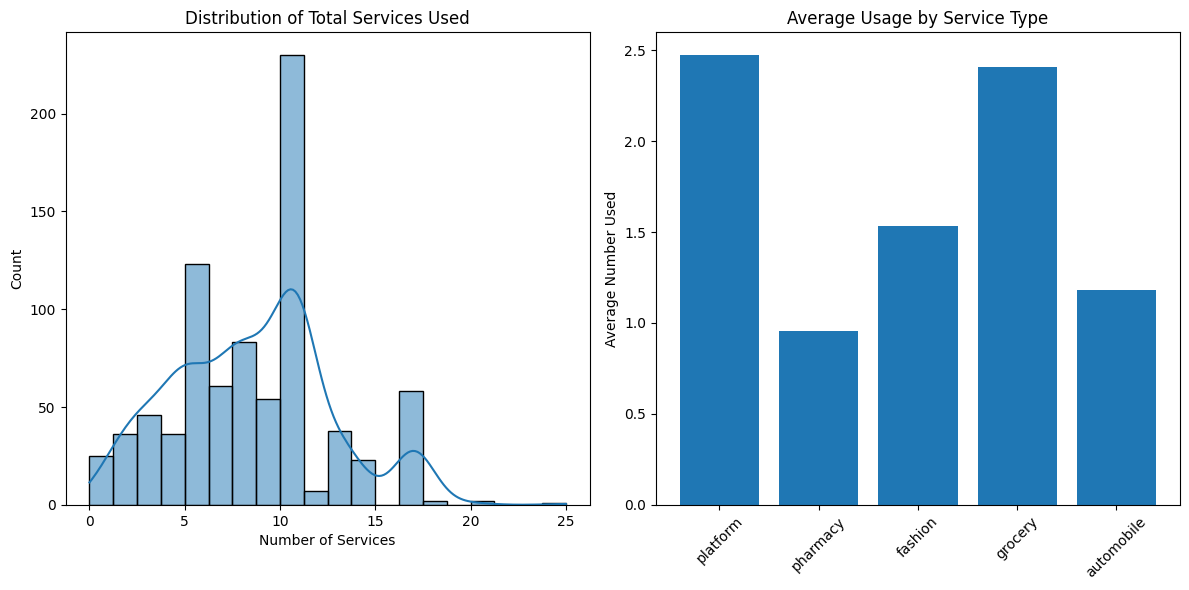

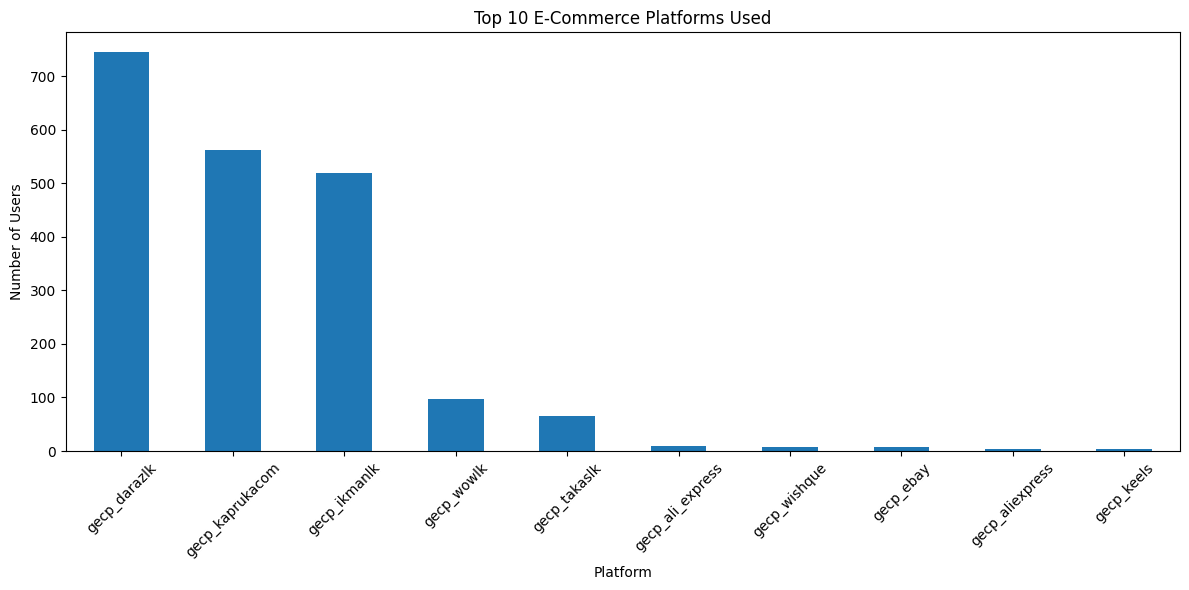

In [27]:
analyze_platform_usage(df)

### **Correlation analysis for key constructs**


CORRELATION ANALYSIS BETWEEN CONSTRUCTS


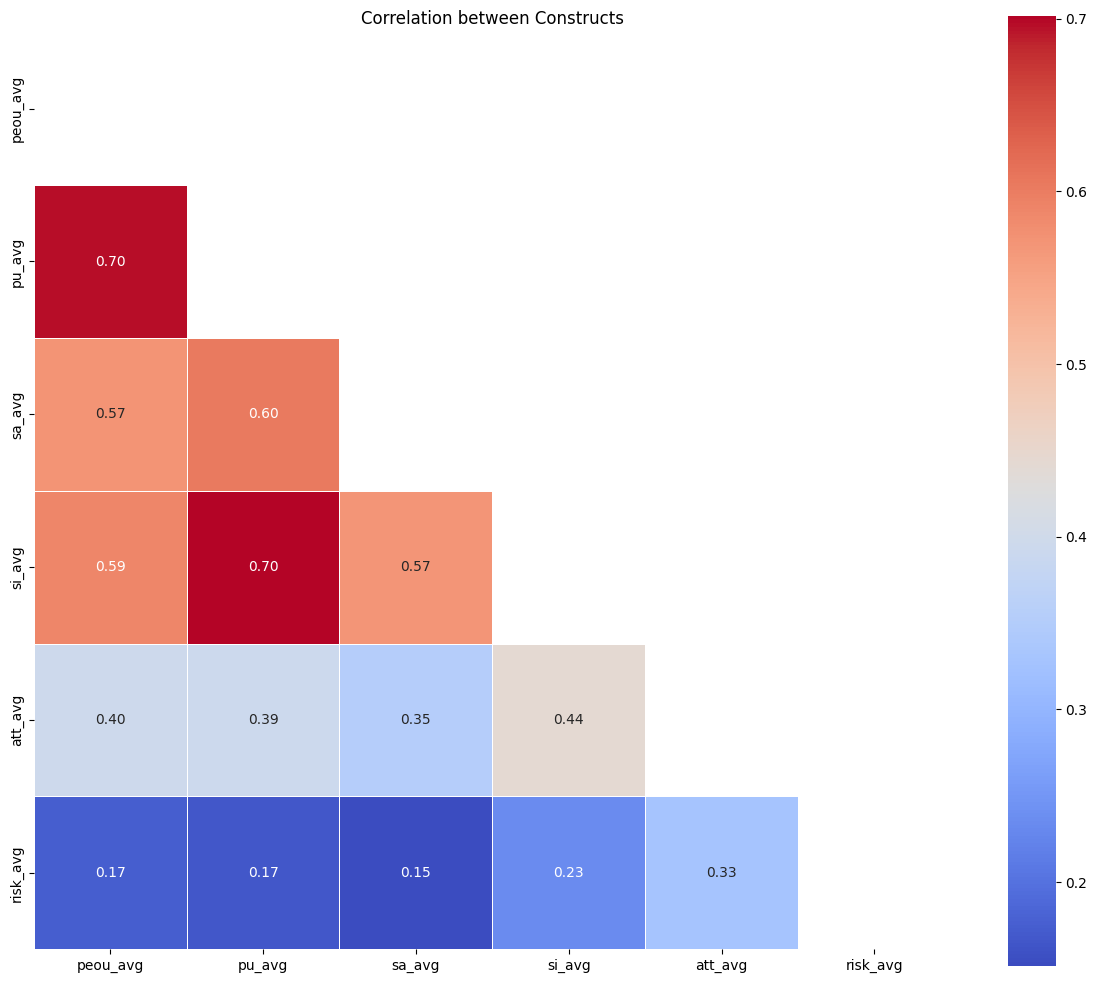

Strong correlations (|r| > 0.5):
si_avg    pu_avg      0.701762
pu_avg    si_avg      0.701762
peou_avg  pu_avg      0.697319
pu_avg    peou_avg    0.697319
sa_avg    pu_avg      0.603332
pu_avg    sa_avg      0.603332
si_avg    peou_avg    0.588521
peou_avg  si_avg      0.588521
          sa_avg      0.571716
sa_avg    peou_avg    0.571716
          si_avg      0.569128
si_avg    sa_avg      0.569128
dtype: float64


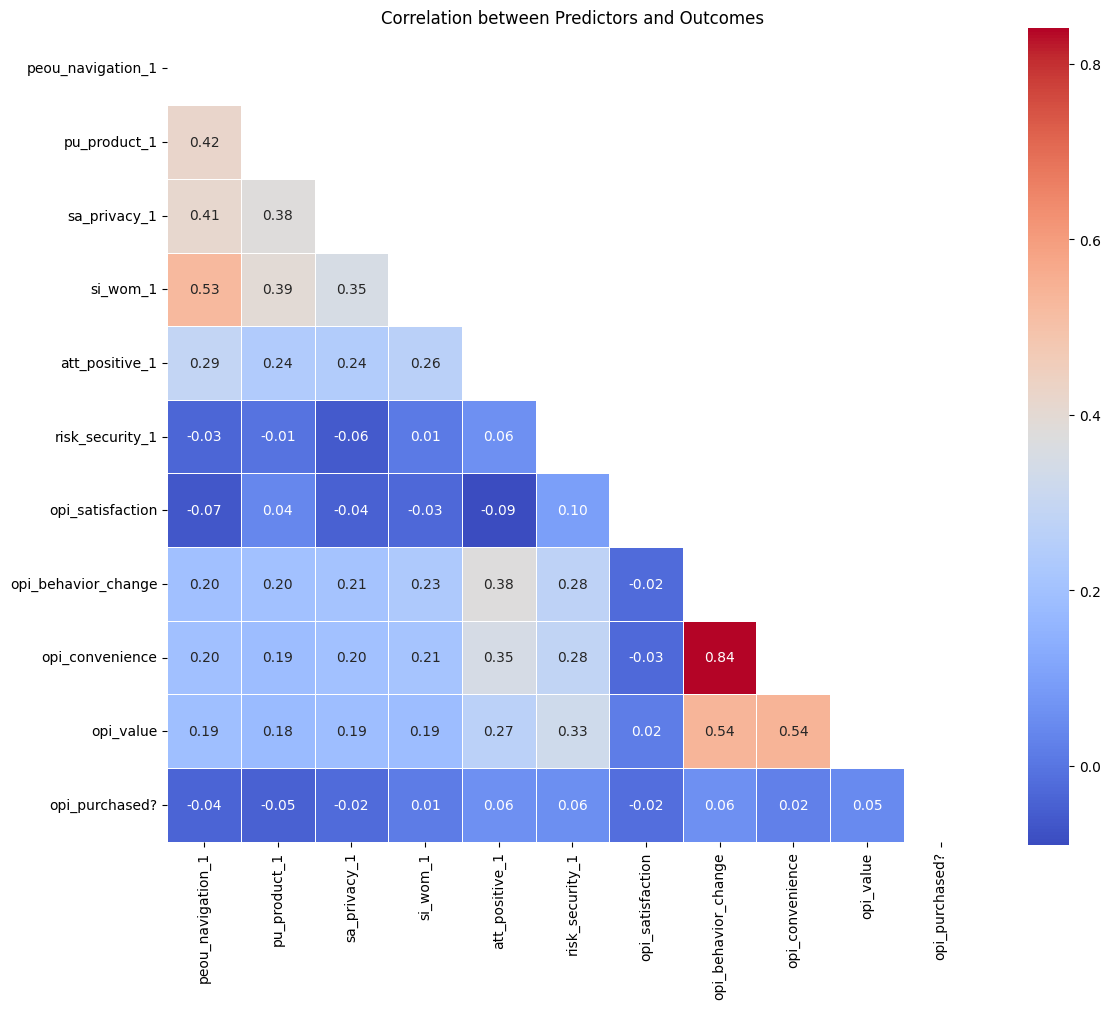

Strong correlations (|r| > 0.5):
opi_behavior_change  opi_convenience        0.840325
opi_convenience      opi_behavior_change    0.840325
                     opi_value              0.539670
opi_value            opi_convenience        0.539670
opi_behavior_change  opi_value              0.536782
opi_value            opi_behavior_change    0.536782
peou_navigation_1    si_wom_1               0.525529
si_wom_1             peou_navigation_1      0.525529
dtype: float64


In [28]:
correlation_analysis(df, constructs)

### **Advanced multivariate analysis**


ADVANCED MULTIVARIATE ANALYSIS


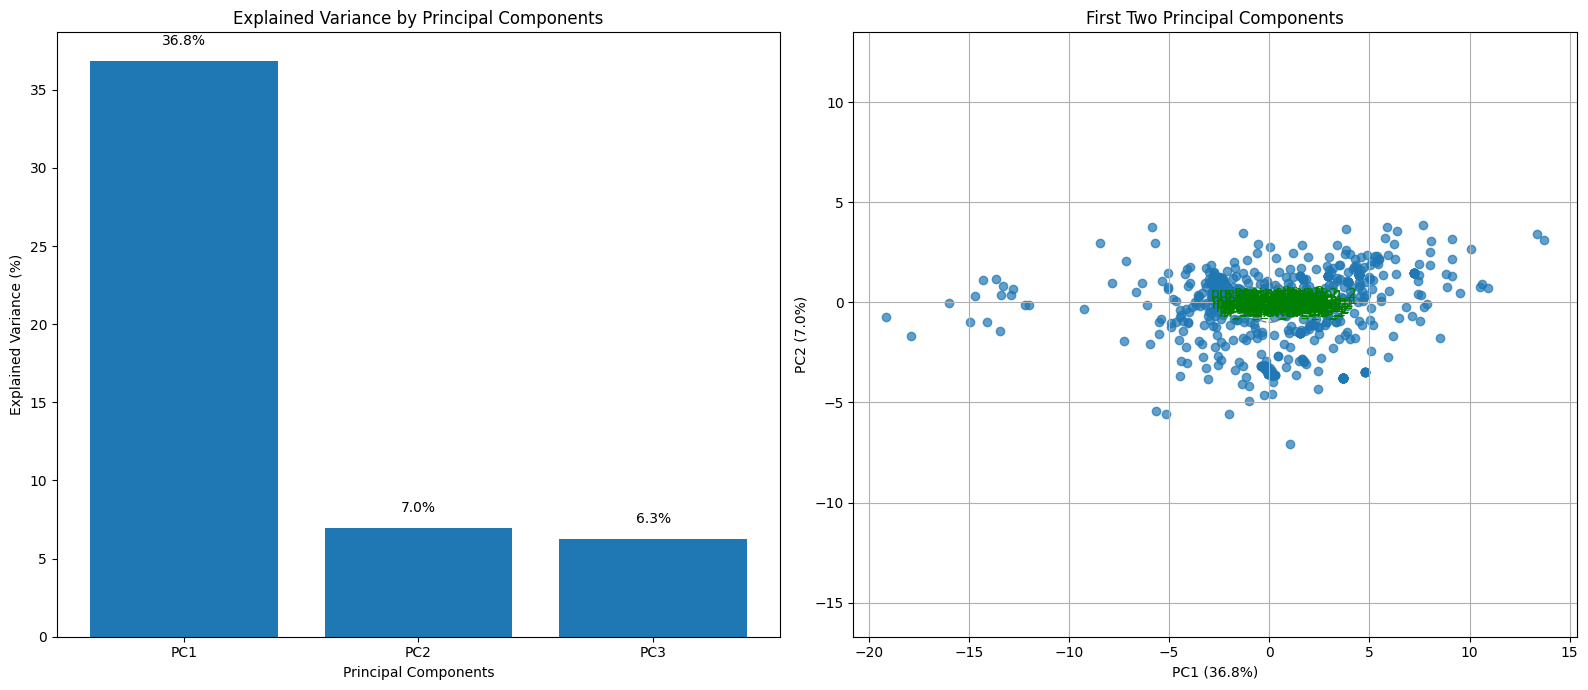

PCA Summary:
Number of components: 3
Total explained variance: 50.04%

Component Loadings:
                           PC1       PC2       PC3
peou_navigation_1     0.171114 -0.199827 -0.149681
peou_navigation_2     0.170628 -0.174692 -0.169503
peou_learning_1       0.162721 -0.084113 -0.270273
peou_learning_2       0.160575 -0.132785 -0.224788
peou_instructions_1   0.169785 -0.010475 -0.274754
peou_instructions_2   0.176426 -0.067283 -0.273117
peou_response_1       0.157627  0.169289 -0.110358
peou_response_2       0.105547  0.206592 -0.163423
peou_error_1          0.145392  0.223739 -0.113772
peou_error_2          0.111718  0.275675 -0.203871
pu_product_1          0.173101  0.047348 -0.072405
pu_product_2          0.161198  0.112430 -0.075367
pu_convenience_1      0.177573 -0.050559 -0.083874
pu_convenience_2      0.191566 -0.158233 -0.044972
pu_cost_1             0.137166  0.111426  0.091207
pu_cost_2             0.144945  0.112149  0.212172
pu_info_1             0.165522  0.099325  

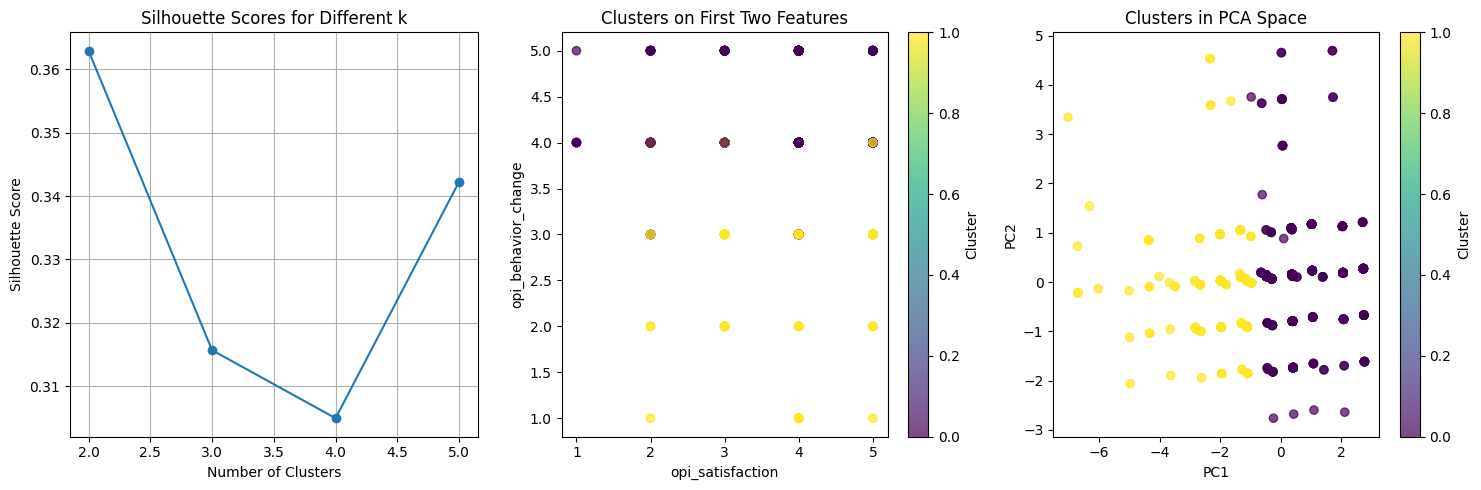


Cluster Profiles:
         opi_satisfaction  opi_behavior_change  opi_convenience  opi_value  \
Cluster                                                                      
0                3.737342             4.175633         4.115506   4.042722   
1                3.761658             3.015544         2.937824   2.922280   

         opi_purchased?  
Cluster                  
0              0.968354  
1              0.963731  

Cluster Sizes:
Cluster 0: 632 observations (76.6%)
Cluster 1: 193 observations (23.4%)


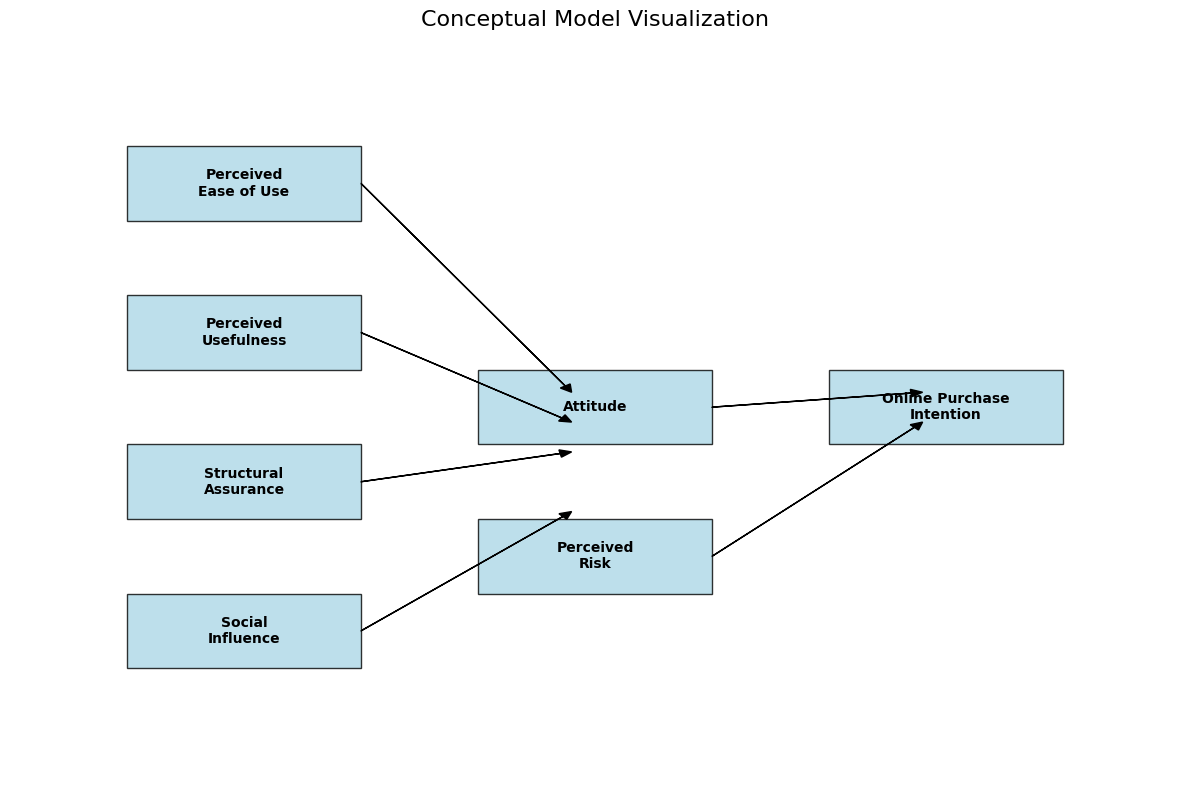

In [29]:
multivariate_analysis(df, constructs)

### **Demographic effects**


Analyzing demographic effects on key outcomes:


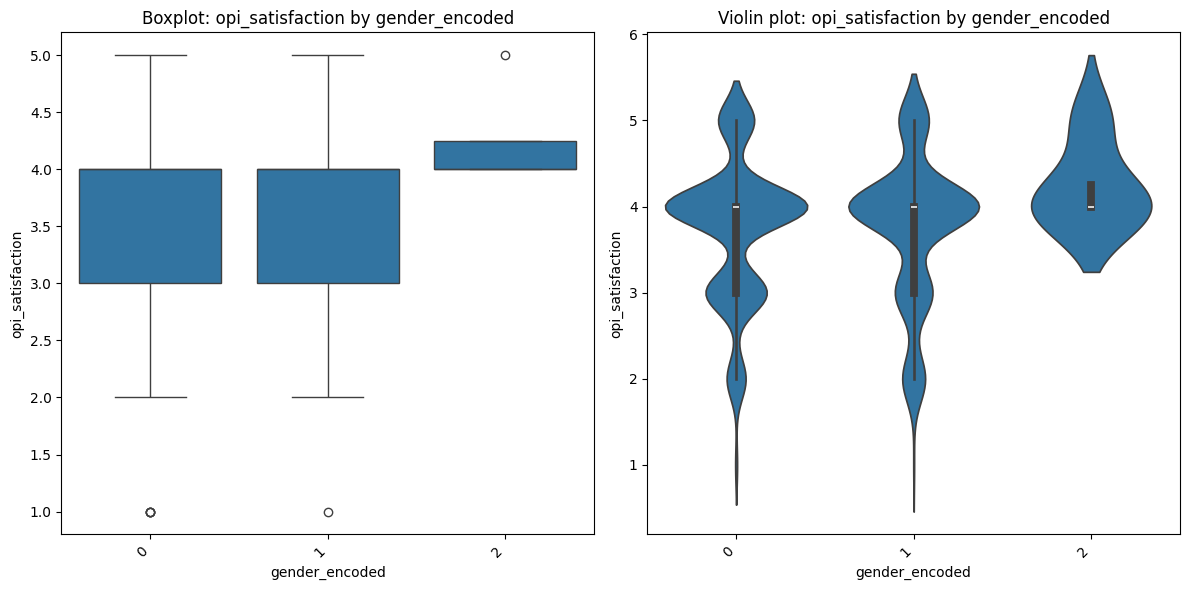


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  3.735883  0.813552    1     4.0    5
1                 272  3.750000  0.830685    1     4.0    5
2                   4  4.250000  0.500000    4     4.0    5

ANOVA Test Results:
F-statistic: 0.7984
p-value: 0.4504
There is no statistically significant difference in opi_satisfaction across gender_encoded groups (p >= 0.05).


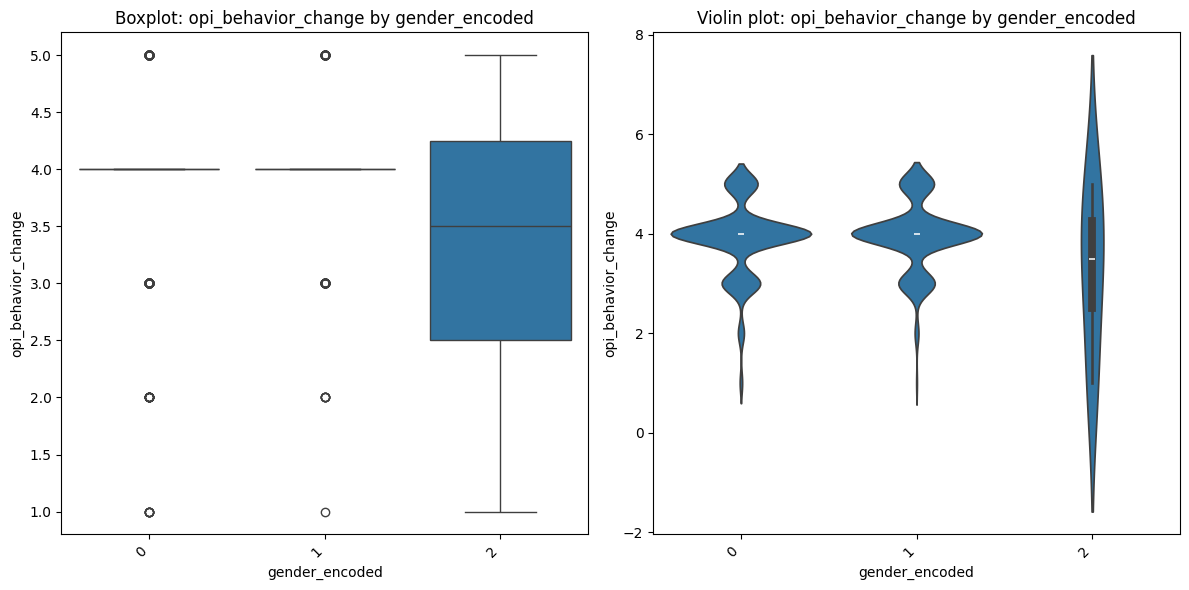


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  3.888889  0.722706    1     4.0    5
1                 272  3.944853  0.671433    1     4.0    5
2                   4  3.250000  1.707825    1     3.5    5

ANOVA Test Results:
F-statistic: 2.2564
p-value: 0.1054
There is no statistically significant difference in opi_behavior_change across gender_encoded groups (p >= 0.05).


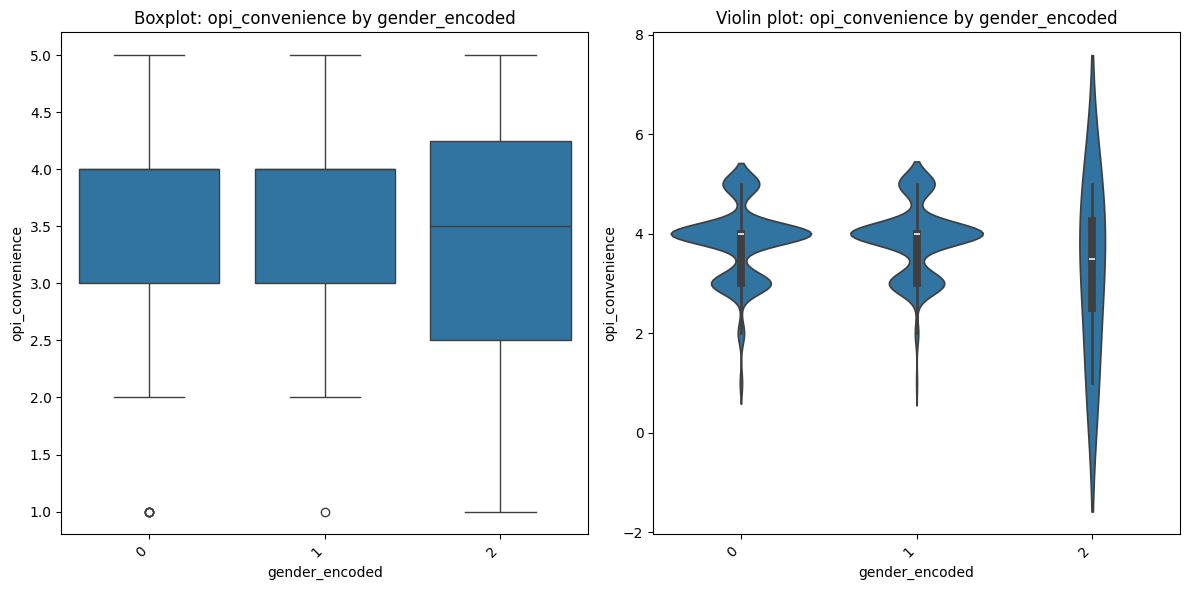


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  3.826958  0.740587    1     4.0    5
1                 272  3.875000  0.691941    1     4.0    5
2                   4  3.250000  1.707825    1     3.5    5

ANOVA Test Results:
F-statistic: 1.7027
p-value: 0.1828
There is no statistically significant difference in opi_convenience across gender_encoded groups (p >= 0.05).


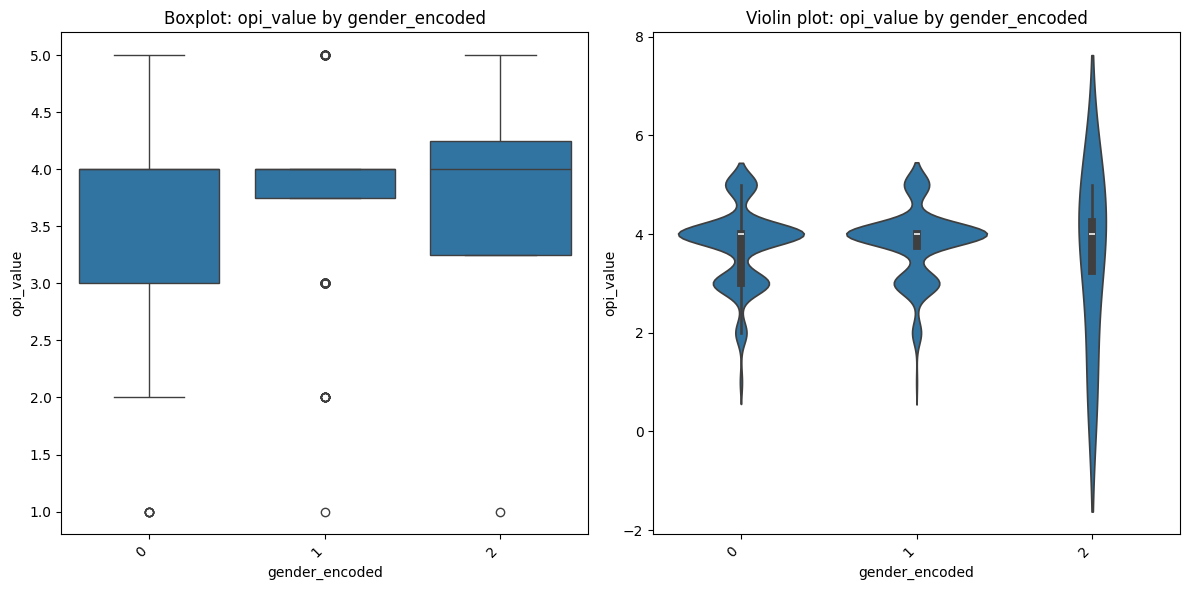


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  3.765027  0.781502    1     4.0    5
1                 272  3.816176  0.694759    1     4.0    5
2                   4  3.500000  1.732051    1     4.0    5

ANOVA Test Results:
F-statistic: 0.6863
p-value: 0.5037
There is no statistically significant difference in opi_value across gender_encoded groups (p >= 0.05).


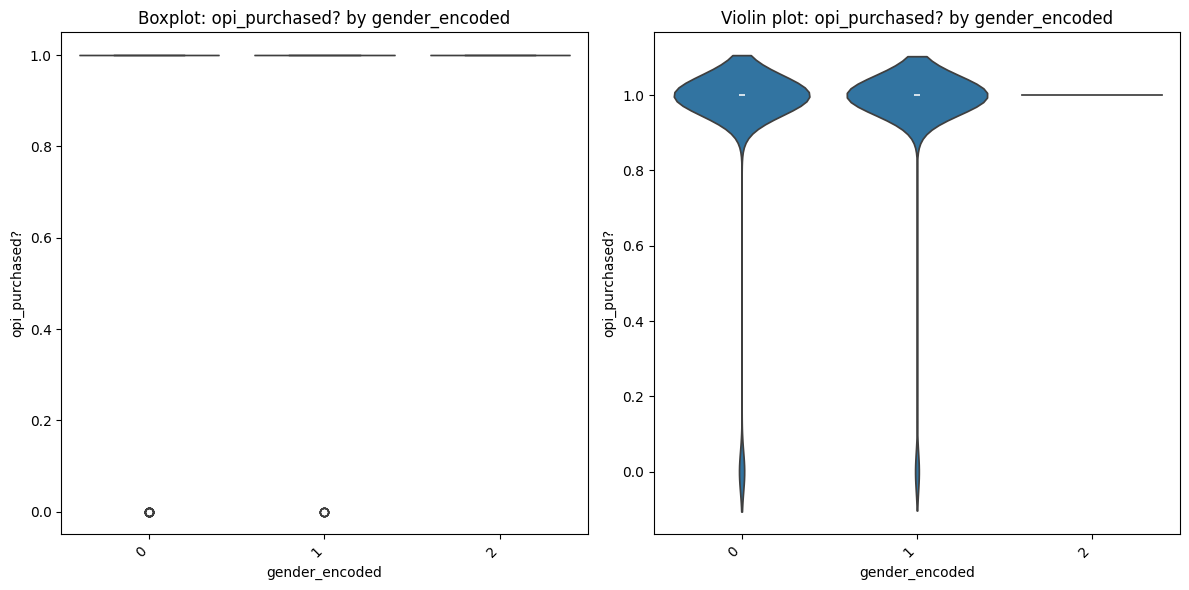


Group Statistics:
                count      mean       std  min  median  max
gender_encoded                                             
0                 549  0.963570  0.187528    0     1.0    1
1                 272  0.974265  0.158636    0     1.0    1
2                   4  1.000000  0.000000    1     1.0    1

ANOVA Test Results:
F-statistic: 0.3955
p-value: 0.6735
There is no statistically significant difference in opi_purchased? across gender_encoded groups (p >= 0.05).


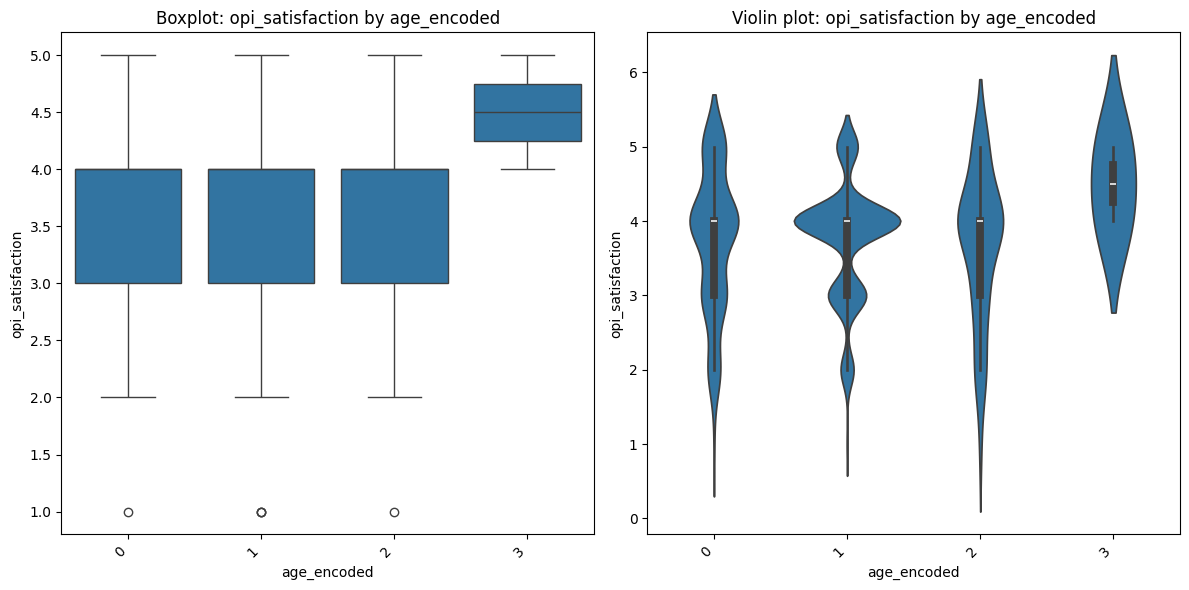


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  3.737589  0.946010    1     4.0    5
1              635  3.746457  0.774372    1     4.0    5
2               47  3.680851  0.980381    1     4.0    5
3                2  4.500000  0.707107    4     4.5    5

ANOVA Test Results:
F-statistic: 0.6662
p-value: 0.5729
There is no statistically significant difference in opi_satisfaction across age_encoded groups (p >= 0.05).


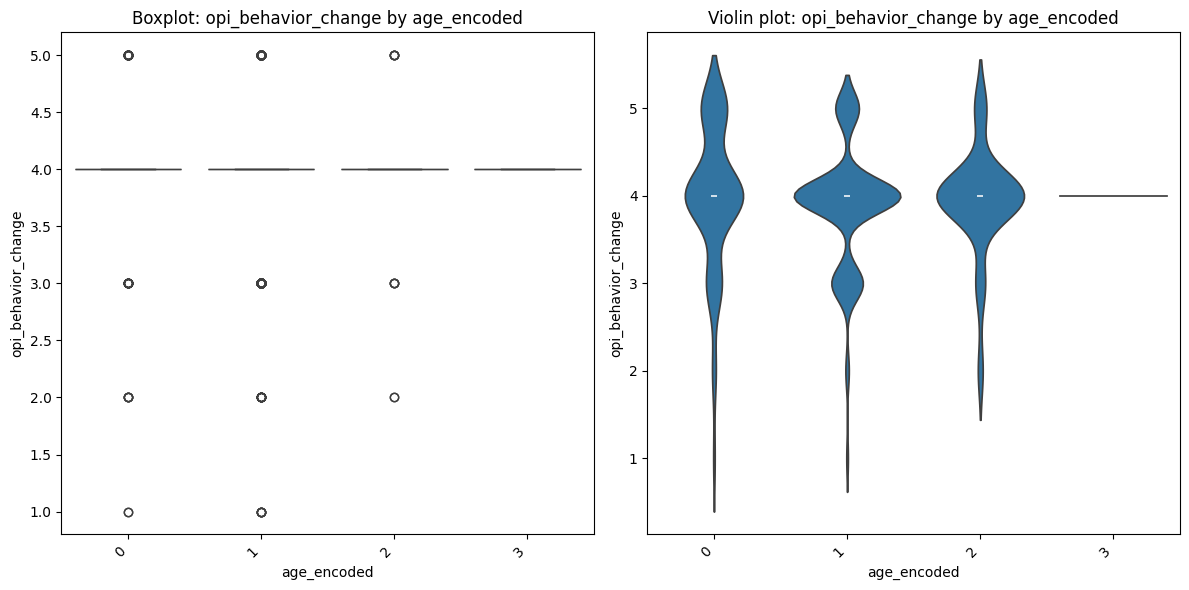


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  3.985816  0.819284    1     4.0    5
1              635  3.883465  0.696291    1     4.0    5
2               47  3.936170  0.604485    2     4.0    5
3                2  4.000000  0.000000    4     4.0    4

ANOVA Test Results:
F-statistic: 0.8368
p-value: 0.4738
There is no statistically significant difference in opi_behavior_change across age_encoded groups (p >= 0.05).


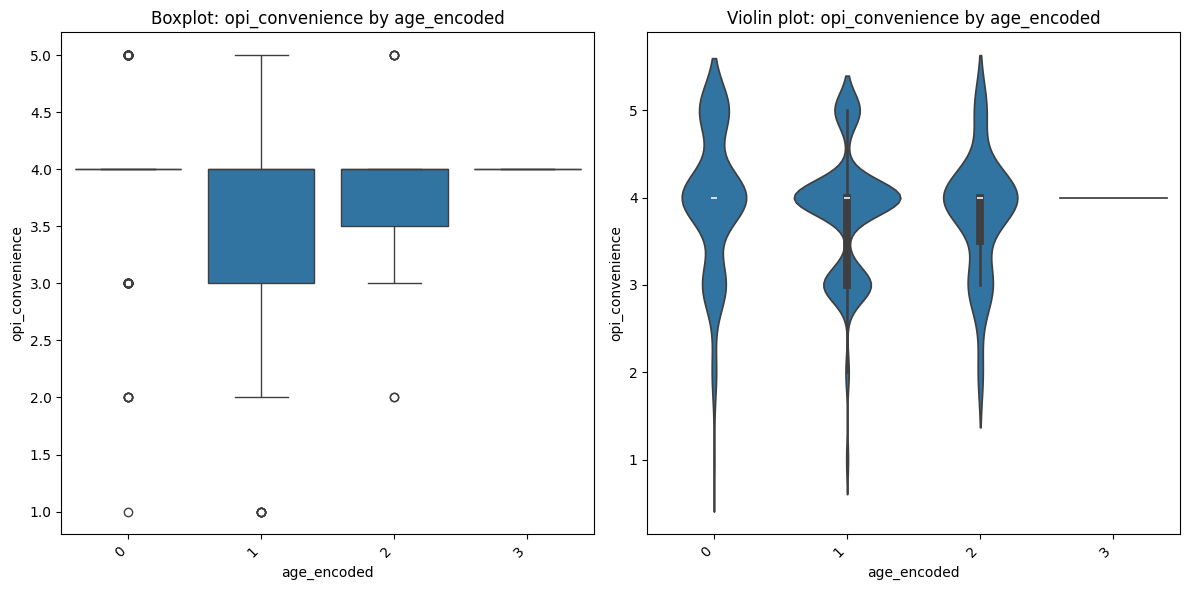


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  3.957447  0.800646    1     4.0    5
1              635  3.815748  0.718659    1     4.0    5
2               47  3.808511  0.680099    2     4.0    5
3                2  4.000000  0.000000    4     4.0    4

ANOVA Test Results:
F-statistic: 1.5081
p-value: 0.2110
There is no statistically significant difference in opi_convenience across age_encoded groups (p >= 0.05).


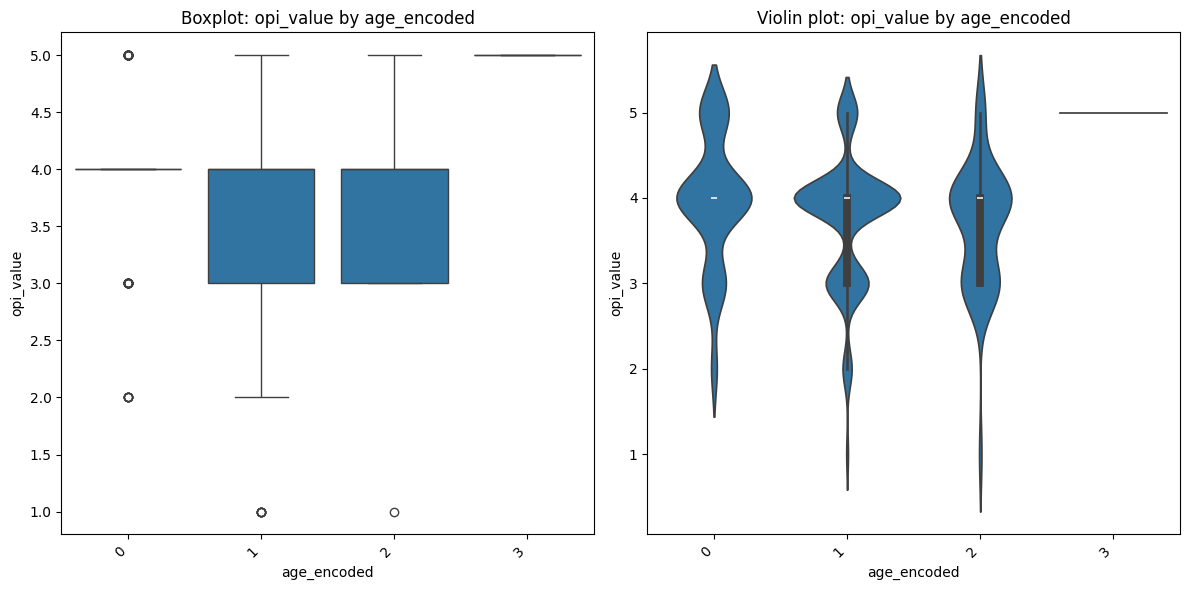


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  3.957447  0.754722    2     4.0    5
1              635  3.744882  0.756331    1     4.0    5
2               47  3.680851  0.725510    1     4.0    5
3                2  5.000000  0.000000    5     5.0    5

ANOVA Test Results:
F-statistic: 5.0797
p-value: 0.0017
There is a statistically significant difference in opi_value across age_encoded groups (p < 0.05).


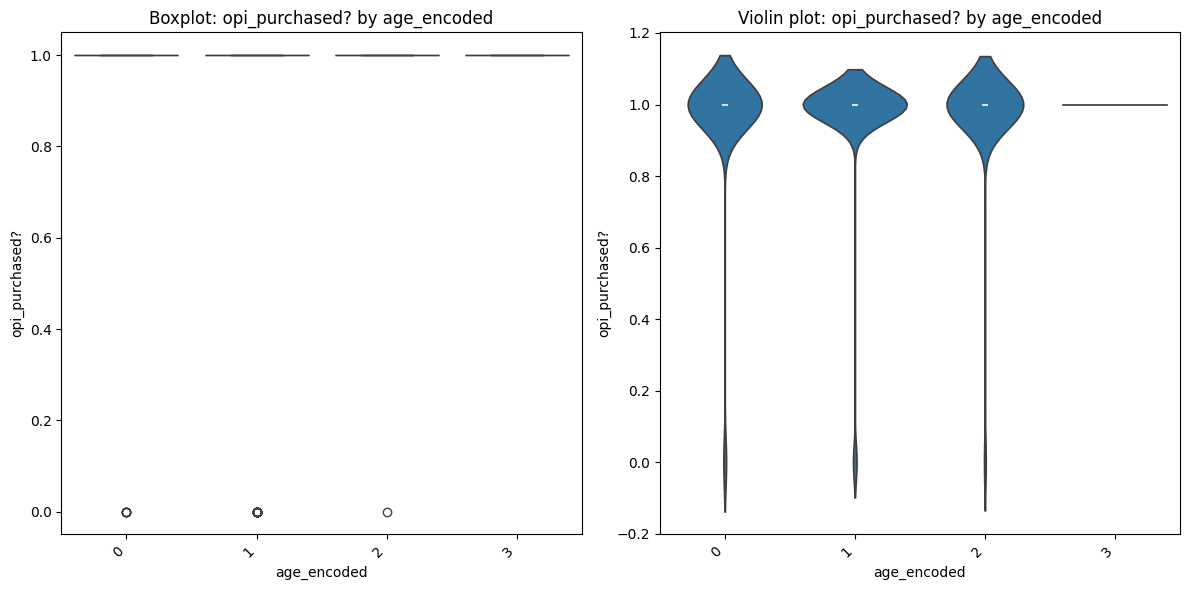


Group Statistics:
             count      mean       std  min  median  max
age_encoded                                             
0              141  0.964539  0.185601    0     1.0    1
1              635  0.966929  0.178963    0     1.0    1
2               47  0.978723  0.145865    0     1.0    1
3                2  1.000000  0.000000    1     1.0    1

ANOVA Test Results:
F-statistic: 0.0989
p-value: 0.9606
There is no statistically significant difference in opi_purchased? across age_encoded groups (p >= 0.05).


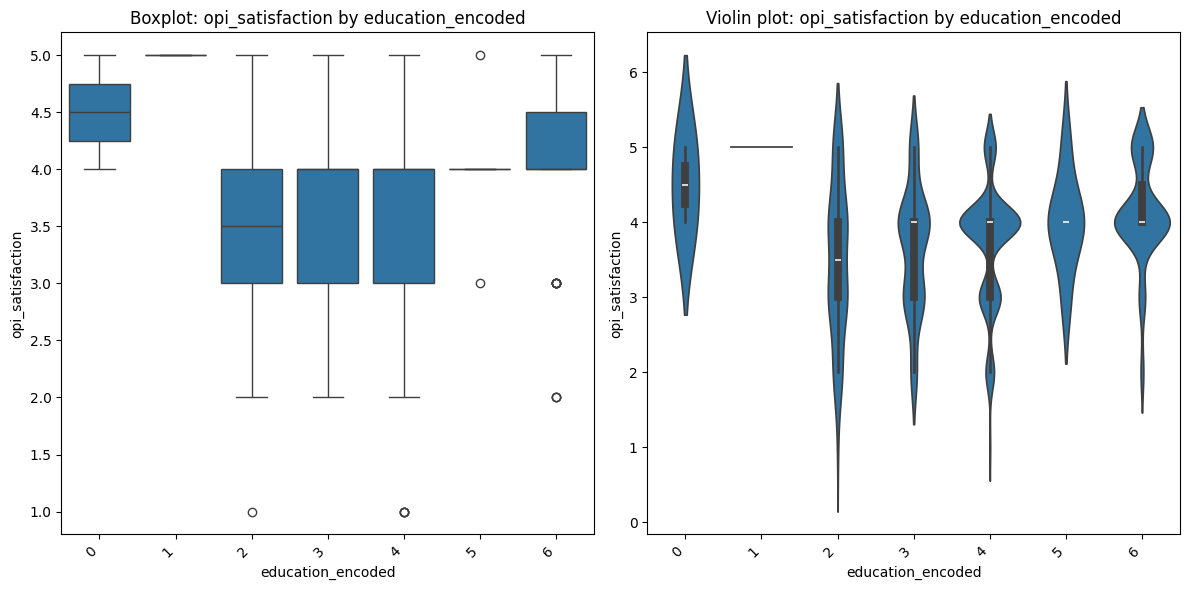


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  4.500000  0.707107    4     4.5    5
1                      1  5.000000       NaN    5     5.0    5
2                     70  3.485714  1.003513    1     3.5    5
3                     77  3.636364  0.825723    2     4.0    5
4                    574  3.719512  0.796854    1     4.0    5
5                      6  4.000000  0.632456    3     4.0    5
6                     95  4.115789  0.666256    2     4.0    5

ANOVA Test Results:
F-statistic: 5.7047
p-value: 0.0000
There is a statistically significant difference in opi_satisfaction across education_encoded groups (p < 0.05).


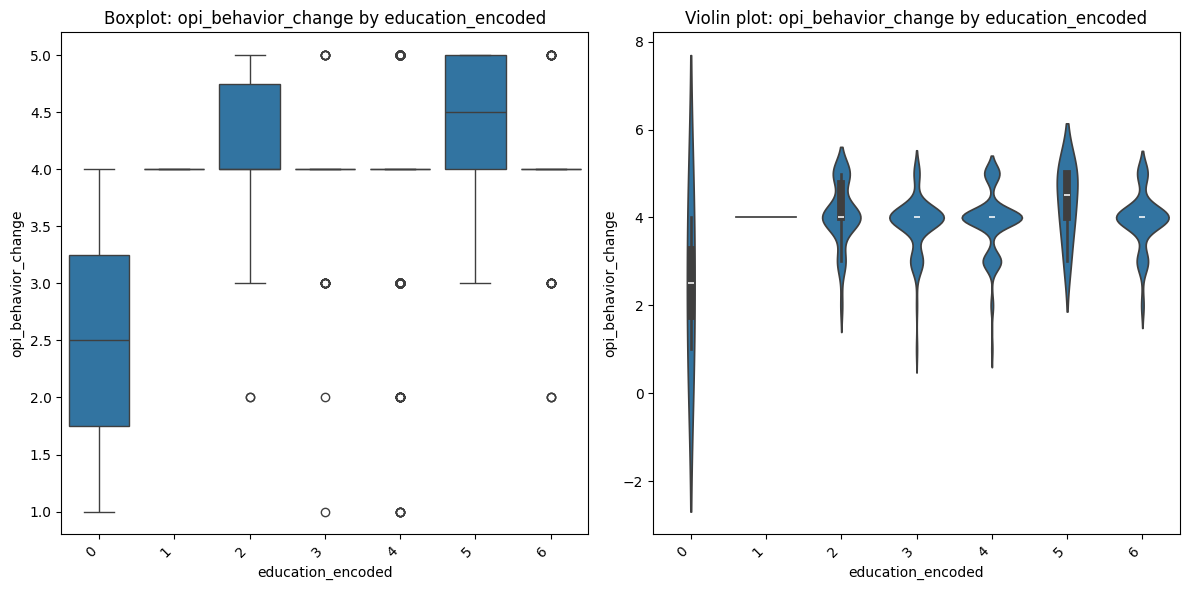


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  2.500000  2.121320    1     2.5    4
1                      1  4.000000       NaN    4     4.0    4
2                     70  4.071429  0.708569    2     4.0    5
3                     77  3.844156  0.629639    1     4.0    5
4                    574  3.888502  0.724616    1     4.0    5
5                      6  4.333333  0.816497    3     4.5    5
6                     95  3.926316  0.639849    2     4.0    5

ANOVA Test Results:
F-statistic: 2.4757
p-value: 0.0222
There is a statistically significant difference in opi_behavior_change across education_encoded groups (p < 0.05).


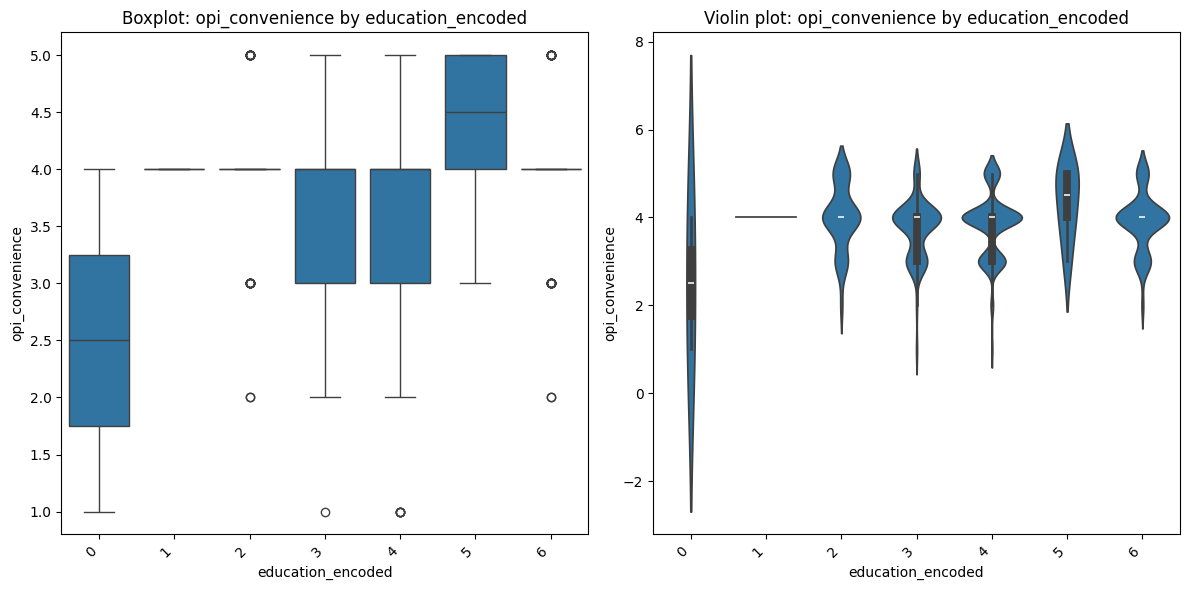


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  2.500000  2.121320    1     2.5    4
1                      1  4.000000       NaN    4     4.0    4
2                     70  4.000000  0.742108    2     4.0    5
3                     77  3.740260  0.676730    1     4.0    5
4                    574  3.822300  0.737756    1     4.0    5
5                      6  4.333333  0.816497    3     4.5    5
6                     95  3.905263  0.653529    2     4.0    5

ANOVA Test Results:
F-statistic: 2.5900
p-value: 0.0172
There is a statistically significant difference in opi_convenience across education_encoded groups (p < 0.05).


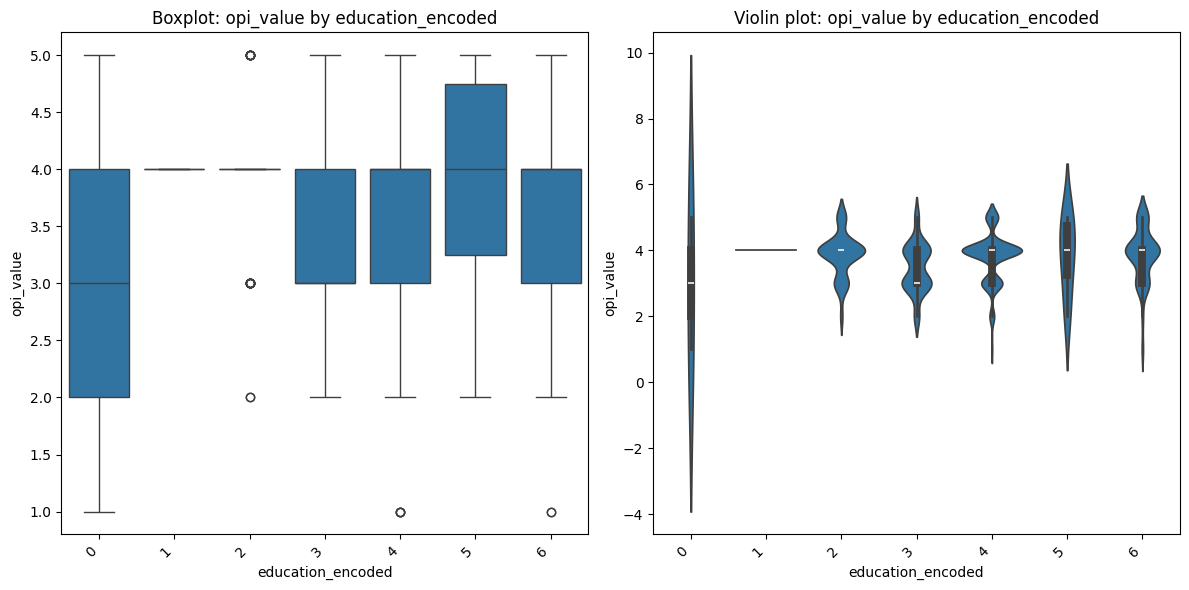


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  3.000000  2.828427    1     3.0    5
1                      1  4.000000       NaN    4     4.0    4
2                     70  3.871429  0.657651    2     4.0    5
3                     77  3.467532  0.735999    2     3.0    5
4                    574  3.799652  0.742572    1     4.0    5
5                      6  3.833333  1.169045    2     4.0    5
6                     95  3.863158  0.820100    1     4.0    5

ANOVA Test Results:
F-statistic: 3.0090
p-value: 0.0065
There is a statistically significant difference in opi_value across education_encoded groups (p < 0.05).


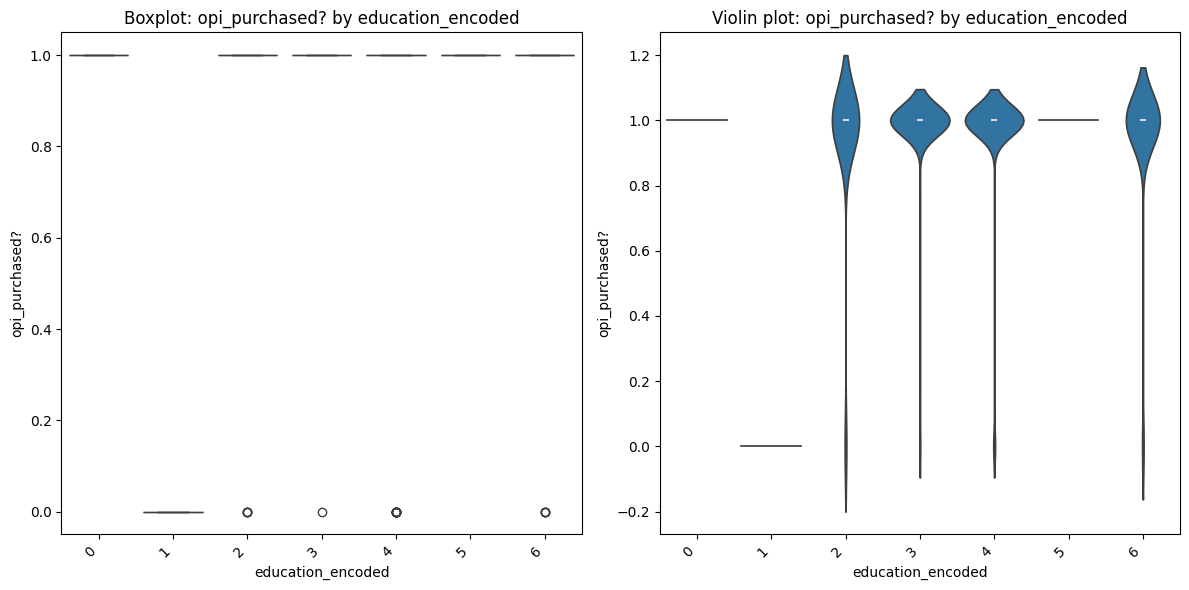


Group Statistics:
                   count      mean       std  min  median  max
education_encoded                                             
0                      2  1.000000  0.000000    1     1.0    1
1                      1  0.000000       NaN    0     0.0    0
2                     70  0.942857  0.233791    0     1.0    1
3                     77  0.987013  0.113961    0     1.0    1
4                    574  0.970383  0.169675    0     1.0    1
5                      6  1.000000  0.000000    1     1.0    1
6                     95  0.957895  0.201895    0     1.0    1

ANOVA Test Results:
F-statistic: 5.5966
p-value: 0.0000
There is a statistically significant difference in opi_purchased? across education_encoded groups (p < 0.05).


In [30]:
print("\nAnalyzing demographic effects on key outcomes:")
for demo in ['gender_encoded', 'age_encoded', 'education_encoded']:
    if demo in df.columns:
        for outcome in outcome_vars:
            bivariate_categorical_numeric(df, demo, outcome)

### **PCA and Cluster analysis**


Performing advanced multivariate analysis:


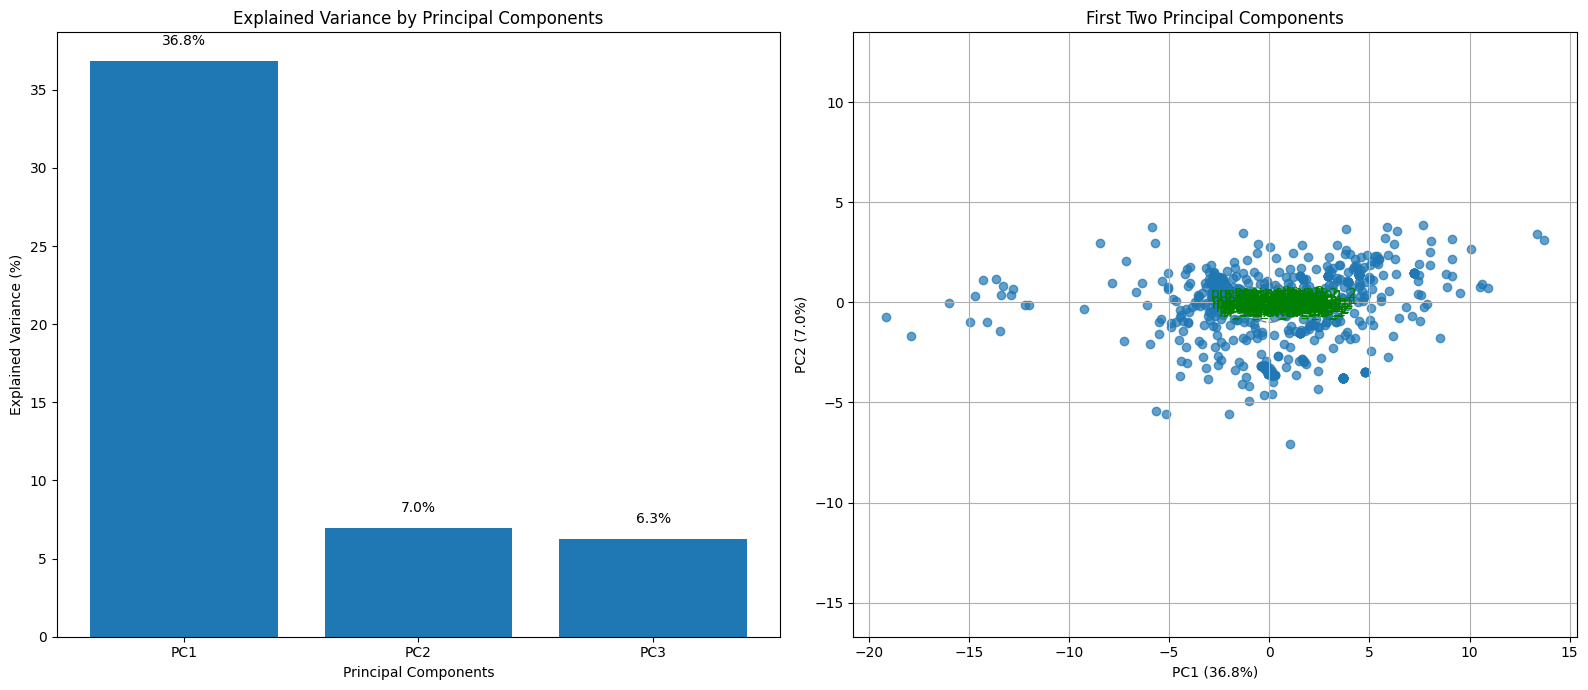

PCA Summary:
Number of components: 3
Total explained variance: 50.04%

Component Loadings:
                           PC1       PC2       PC3
peou_navigation_1     0.171114 -0.199827 -0.149681
peou_navigation_2     0.170628 -0.174692 -0.169503
peou_learning_1       0.162721 -0.084113 -0.270273
peou_learning_2       0.160575 -0.132785 -0.224788
peou_instructions_1   0.169785 -0.010475 -0.274754
peou_instructions_2   0.176426 -0.067283 -0.273117
peou_response_1       0.157627  0.169289 -0.110358
peou_response_2       0.105547  0.206592 -0.163423
peou_error_1          0.145392  0.223739 -0.113772
peou_error_2          0.111718  0.275675 -0.203871
pu_product_1          0.173101  0.047348 -0.072405
pu_product_2          0.161198  0.112430 -0.075367
pu_convenience_1      0.177573 -0.050559 -0.083874
pu_convenience_2      0.191566 -0.158233 -0.044972
pu_cost_1             0.137166  0.111426  0.091207
pu_cost_2             0.144945  0.112149  0.212172
pu_info_1             0.165522  0.099325  

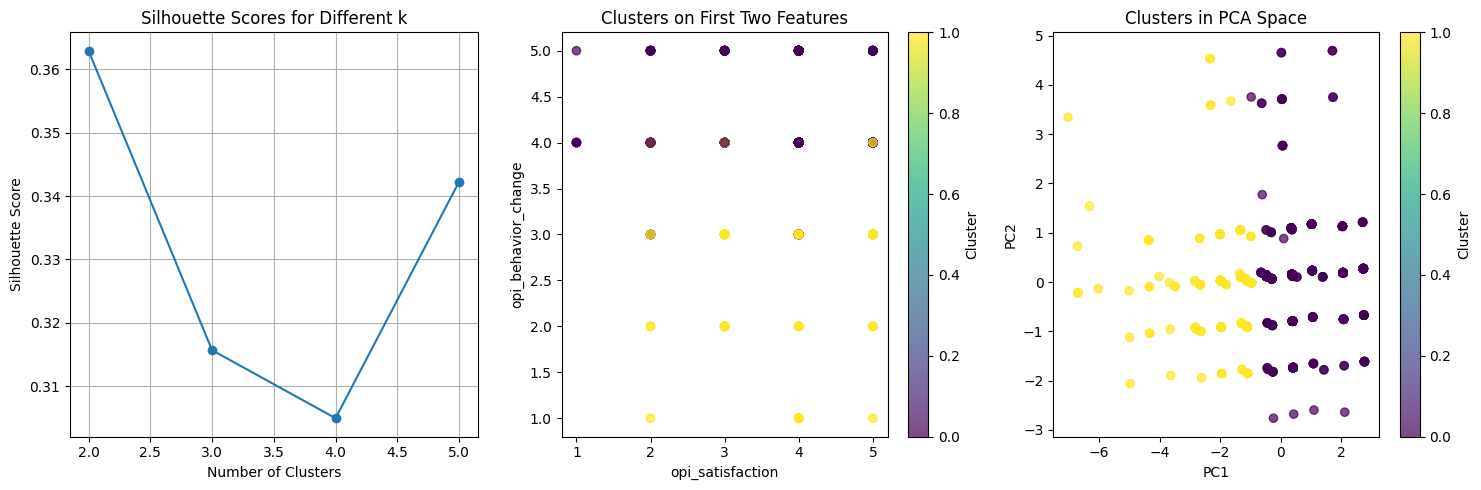


Cluster Profiles:
         opi_satisfaction  opi_behavior_change  opi_convenience  opi_value  \
Cluster                                                                      
0                3.737342             4.175633         4.115506   4.042722   
1                3.761658             3.015544         2.937824   2.922280   

         opi_purchased?  
Cluster                  
0              0.968354  
1              0.963731  

Cluster Sizes:
Cluster 0: 632 observations (76.6%)
Cluster 1: 193 observations (23.4%)


(KMeans(n_clusters=2, random_state=42),
      opi_satisfaction  opi_behavior_change  opi_convenience  opi_value  \
 0                   3                    3                2          3   
 1                   4                    4                4          4   
 2                   4                    5                5          4   
 3                   4                    4                4          4   
 4                   4                    4                4          3   
 ..                ...                  ...              ...        ...   
 820                 4                    4                4          4   
 821                 4                    4                4          4   
 822                 4                    3                4          3   
 823                 4                    3                3          3   
 824                 4                    3                3          3   
 
      opi_purchased?  Cluster  
 0                 1      

In [31]:
print("\nPerforming advanced multivariate analysis:")
    
# PCA on main constructs (excluding platform/store variables)
main_vars = constructs['peou'] + constructs['pu'] + constructs['sa'] + constructs['si'] + constructs['att'] + constructs['risk']
pca_analysis(df, main_vars, n_components=3)
    
# Cluster analysis on outcome variables
cluster_analysis(df, outcome_vars)
    